In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
final_data = pd.read_csv('C:/Users/COMTECH COMPUTER/Desktop/UK energy conumptipon data/great_britian_electricity_consumption_2009_to_2024.csv')

In [61]:
#-> Converting to date time format
final_data['settlement_date'] = pd.to_datetime(final_data['settlement_date'])
final_data.set_index('settlement_date', inplace=True)

In [62]:
final_data['2009-01-01':'2009-01-07'].head(3)

,nd,embedded_wind_generation,embedded_solar_generation
settlement_date,,,
2009-01-01 00:00:00,37910,54,0
2009-01-01 00:30:00,38047,53,0
2009-01-01 01:00:00,37380,53,0


In [63]:
final_data.tail()

,nd,embedded_wind_generation,embedded_solar_generation
settlement_date,,,
2024-12-31 21:30:00,23565,5685,0
2024-12-31 22:00:00,22463,5668,0
2024-12-31 22:30:00,21753,5650,0
2024-12-31 23:00:00,21000,5551,0
2024-12-31 23:30:00,20788,5452,0


In [84]:
# # Extract time-based features
final_data['year']  = final_data.index.year
final_data['month'] = final_data.index.month
final_data['week']  = final_data.index.isocalendar().week
final_data['day_of_week'] = final_data.index.dayofweek
final_data['day_of_year'] = final_data.index.dayofyear
final_data['weekend']     = final_data['day_of_week'].isin([5, 6])  # Saturday & Sunday as weekends
final_data['wind + solar generation'] = final_data['embedded_wind_generation'] + final_data['embedded_solar_generation']
final_data['total_consumption']       = final_data['nd'] + final_data['wind + solar generation']

In [85]:
# final_data.tail(2)

In [86]:
final_data.columns

Index(['nd', 'embedded_wind_generation', 'embedded_solar_generation', 'year',
       'month', 'week', 'day_of_week', 'day_of_year', 'weekend',
       'wind + solar generation', 'total_consumption'],
      dtype='object')

In [87]:
# col1 = final_data.pop('wind + solar generation')
# final_data.insert(3,'wind + solar generation',col1)

In [88]:
final_data.head()

,nd,embedded_wind_generation,embedded_solar_generation,year,month,week,day_of_week,day_of_year,weekend,wind + solar generation,total_consumption
settlement_date,,,,,,,,,,,
2009-01-01 00:00:00,37910,54,0,2009,1,1,3,1,False,54,37964
2009-01-01 00:30:00,38047,53,0,2009,1,1,3,1,False,53,38100
2009-01-01 01:00:00,37380,53,0,2009,1,1,3,1,False,53,37433
2009-01-01 01:30:00,36426,50,0,2009,1,1,3,1,False,50,36476
2009-01-01 02:00:00,35687,50,0,2009,1,1,3,1,False,50,35737


# Consumption trend

In [89]:
final_data['2009-01-01':'2009-01-07'].head()

,nd,embedded_wind_generation,embedded_solar_generation,year,month,week,day_of_week,day_of_year,weekend,wind + solar generation,total_consumption
settlement_date,,,,,,,,,,,
2009-01-01 00:00:00,37910,54,0,2009,1,1,3,1,False,54,37964
2009-01-01 00:30:00,38047,53,0,2009,1,1,3,1,False,53,38100
2009-01-01 01:00:00,37380,53,0,2009,1,1,3,1,False,53,37433
2009-01-01 01:30:00,36426,50,0,2009,1,1,3,1,False,50,36476
2009-01-01 02:00:00,35687,50,0,2009,1,1,3,1,False,50,35737


In [90]:
yearly_data = final_data['nd']['2009-01-01':'2009-12-31'].resample('ME').mean()
pd.DataFrame(yearly_data).head()



,nd
settlement_date,
2009-01-31,42499.286962
2009-02-28,41721.263393
2009-03-31,38034.520188
2009-04-30,34244.037500
2009-05-31,32551.792339


# Seasonal Trend

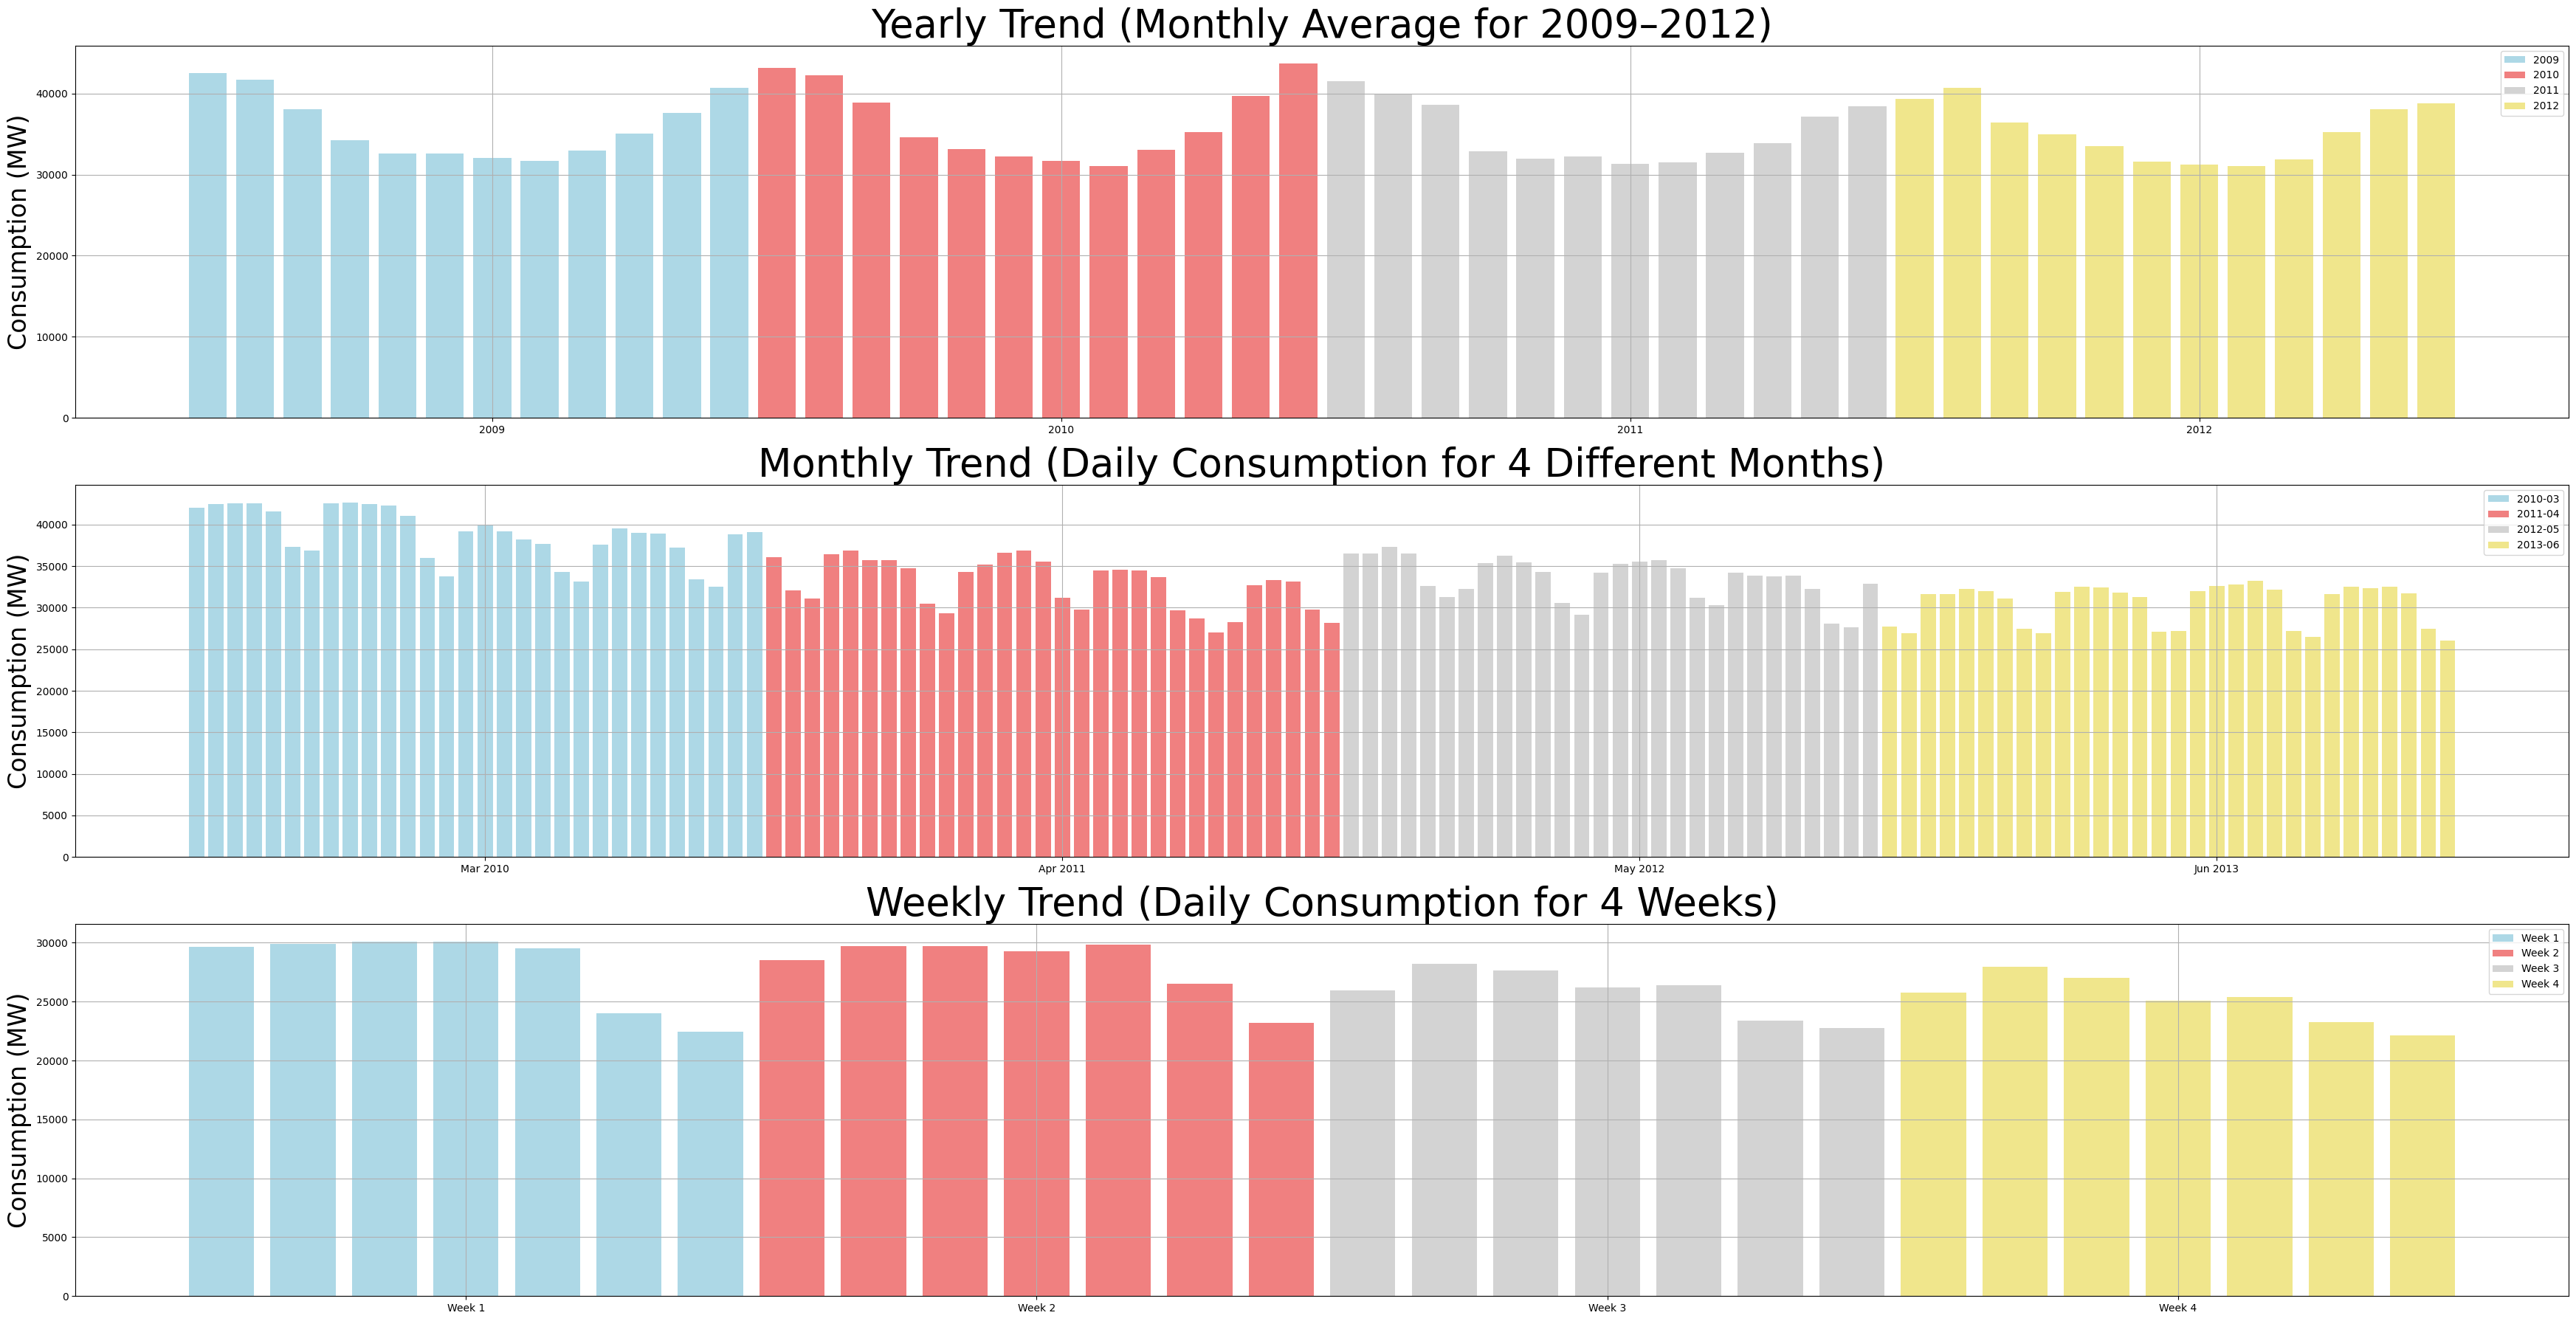

In [91]:
fig, axes = plt.subplots(3, 1, figsize=(35, 18))

# 🎨 Colors
colours = ['lightblue', 'lightcoral', 'lightgray', 'khaki']

# 1️⃣ Yearly Trend — Monthly average for 4 years
years = [2009, 2010, 2011, 2012]
start_pos = 0
for i, year in enumerate(years):
    monthly_avg = final_data['nd'][f'{year}'].resample('ME').mean()
    x_vals = range(start_pos, start_pos + 12)
    axes[0].bar(x_vals, monthly_avg.values, color=colours[i], label=str(year))
    start_pos += 12

axes[0].set_title('Yearly Trend (Monthly Average for 2009–2012)', fontsize=38)
axes[0].set_ylabel('Consumption (MW)', fontsize=24)
axes[0].set_xticks([6 + 12*i for i in range(4)])
axes[0].set_xticklabels([str(y) for y in years])
axes[0].legend()
axes[0].grid(True)

# 2️⃣ Monthly Trend — Daily values for 4 different months
months = ['2010-03', '2011-04', '2012-05', '2013-06']
start_pos = 0
for i, month in enumerate(months):
    daily = final_data['nd'][f'{month}-01':f'{month}-30'].resample('D').mean()
    x_vals = range(start_pos, start_pos + len(daily))
    axes[1].bar(x_vals, daily.values, color=colours[i], label=month)
    start_pos += len(daily)

axes[1].set_title('Monthly Trend (Daily Consumption for 4 Different Months)', fontsize=38)
axes[1].set_ylabel('Consumption (MW)',  fontsize=24)
axes[1].set_xticks([15 + 30*i for i in range(4)])
axes[1].set_xticklabels(['Mar 2010', 'Apr 2011', 'May 2012', 'Jun 2013'])
axes[1].legend()
axes[1].grid(True)

# 3️⃣ Weekly Trend — Daily values for 4 different weeks
weeks = ['2015-06-01', '2016-06-06', '2017-06-12', '2018-06-18']
start_pos = 0
for i, start_date in enumerate(weeks):
    end_date = pd.to_datetime(start_date) + pd.Timedelta(days=6)  # 7 days total
    week = final_data['nd'][start_date:end_date].resample('D').mean()
    x_vals = range(start_pos, start_pos + len(week))
    axes[2].bar(x_vals, week.values, color=colours[i], label=f'Week {i+1}')
    start_pos += len(week)

axes[2].set_title('Weekly Trend (Daily Consumption for 4 Weeks)', fontsize=38)
axes[2].set_ylabel('Consumption (MW)',  fontsize=24)
axes[2].set_xticks([3 + 7*i for i in range(4)])
axes[2].set_xticklabels(['Week 1', 'Week 2', 'Week 3', 'Week 4'])
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


# Comparision of 2009 & 2024

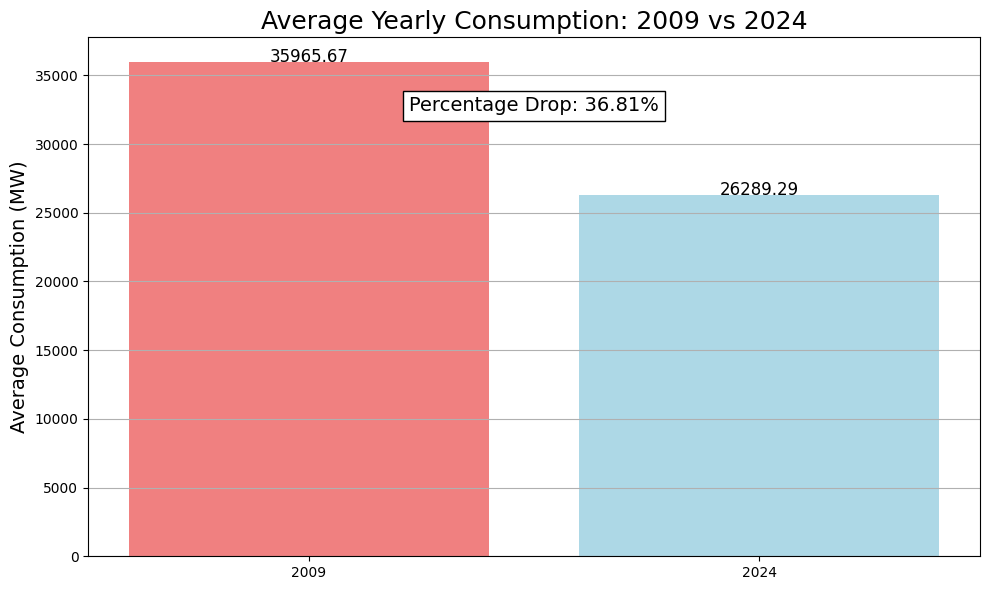

In [92]:
# 🎯 Filter data for 2013 and 2023
data_2009 = final_data[final_data['year'] == 2009]
data_2024 = final_data[final_data['year'] == 2024]

# 📊 Calculate the yearly average consumption directly
avg_2009 = data_2009['nd'].mean()
avg_2024 = data_2024['nd'].mean()

# 📉 Calculate percentage drop
percent_drop = ((avg_2009 - avg_2024) / avg_2024) * 100

# 🖼️ Plotting just 2 bars
plt.figure(figsize=(10, 6))
bars = plt.bar(['2009', '2024'], [avg_2009, avg_2024], color=['lightcoral', 'lightblue'])

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f'{yval:.2f}', ha='center', fontsize=12)

# Add percentage drop text
plt.text(0.5, max(avg_2009, avg_2024) * 0.9, 
         f'Percentage Drop: {percent_drop:.2f}%', 
         ha='center', fontsize=14, bbox=dict(facecolor='white', edgecolor='black'))

# 🏷️ Labels
plt.title('Average Yearly Consumption: 2009 vs 2024', fontsize=18)
plt.ylabel('Average Consumption (MW)', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Yearly consumption pattern(Average representation)

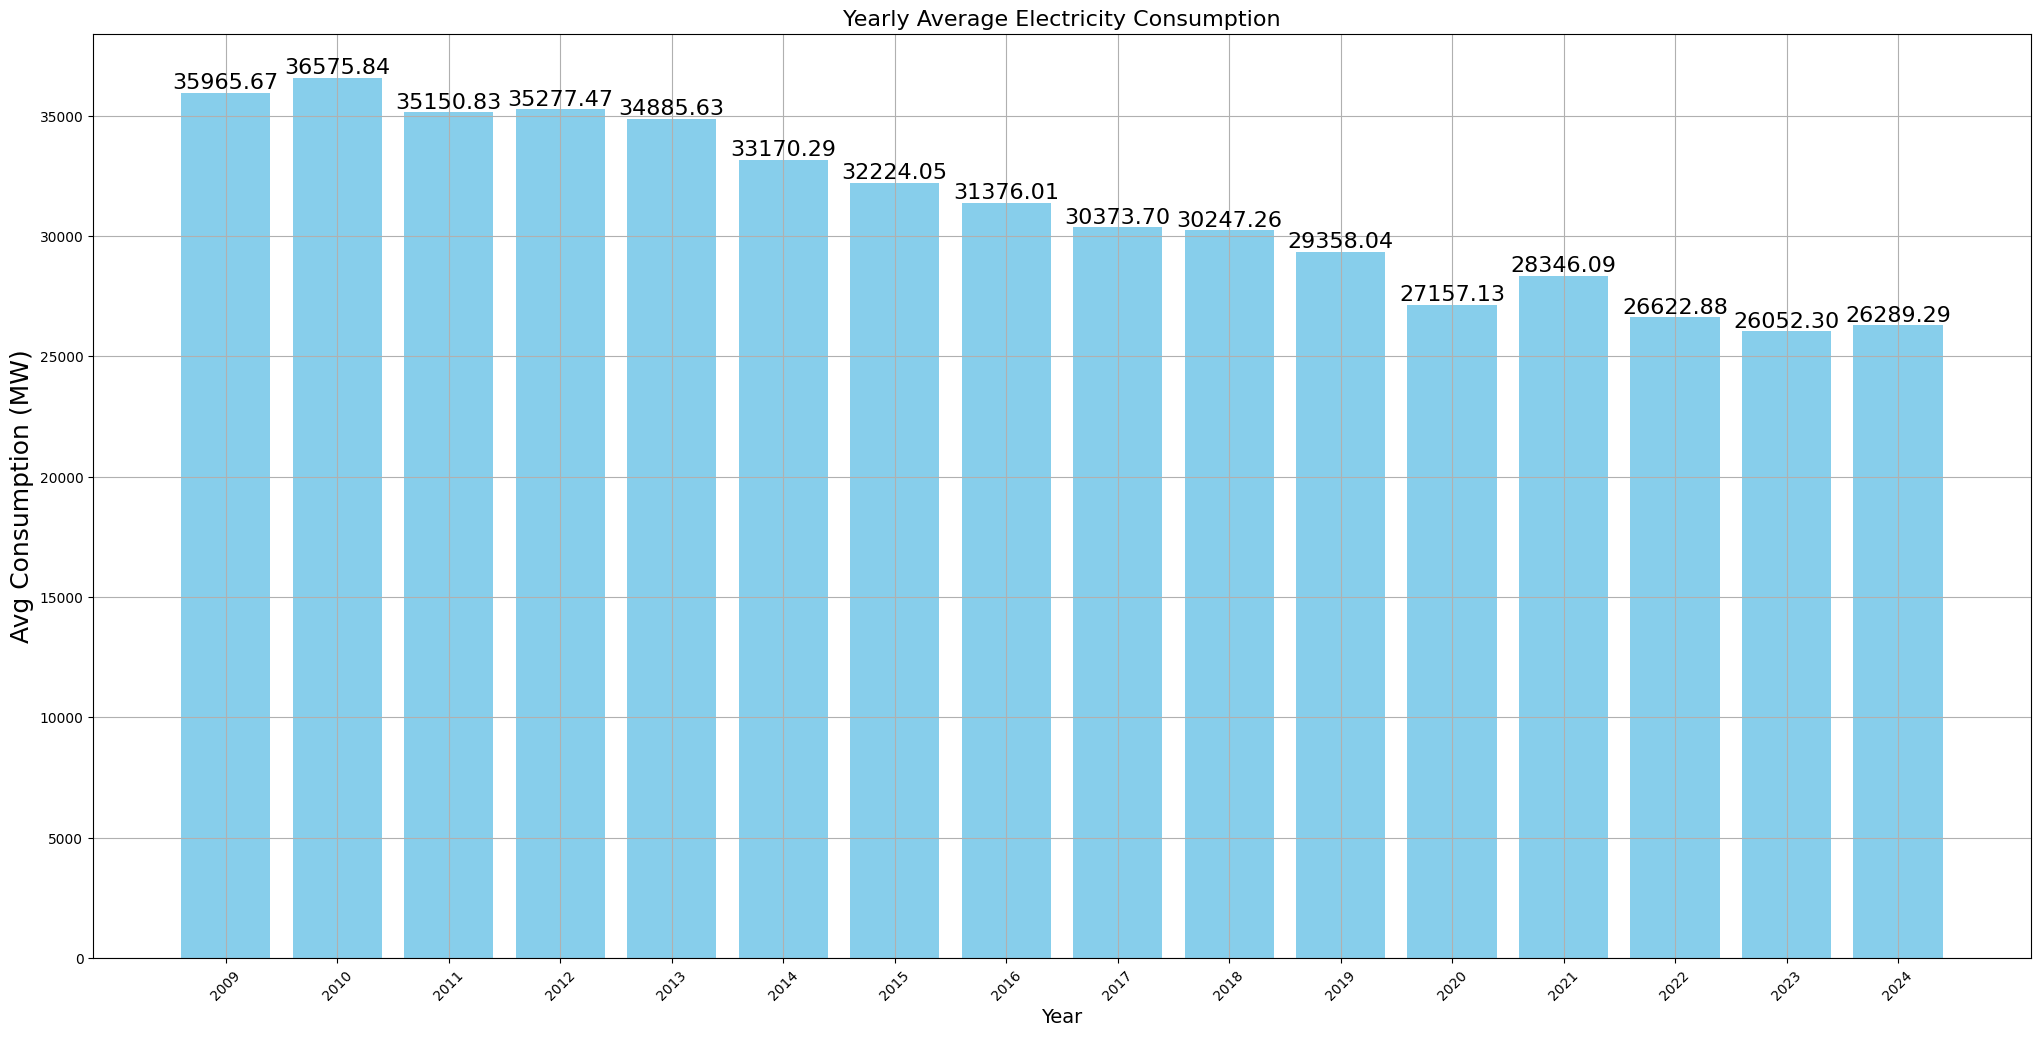

In [93]:
# Yearly Average Consumption
yearly_avg = final_data['nd'].resample('YE').mean()
years = yearly_avg.index.year

plt.figure(figsize=(25, 12))
bars01 = plt.bar(years, yearly_avg, color='skyblue')

# Add value labels
for bar in bars01:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=16)

plt.xlabel('Year', fontsize=14)
plt.ylabel('Avg Consumption (MW)', fontsize=18)
plt.title('Yearly Average Electricity Consumption', fontsize=16)
plt.xticks(years, rotation=45)
plt.grid()
plt.show()


# Percentage Change

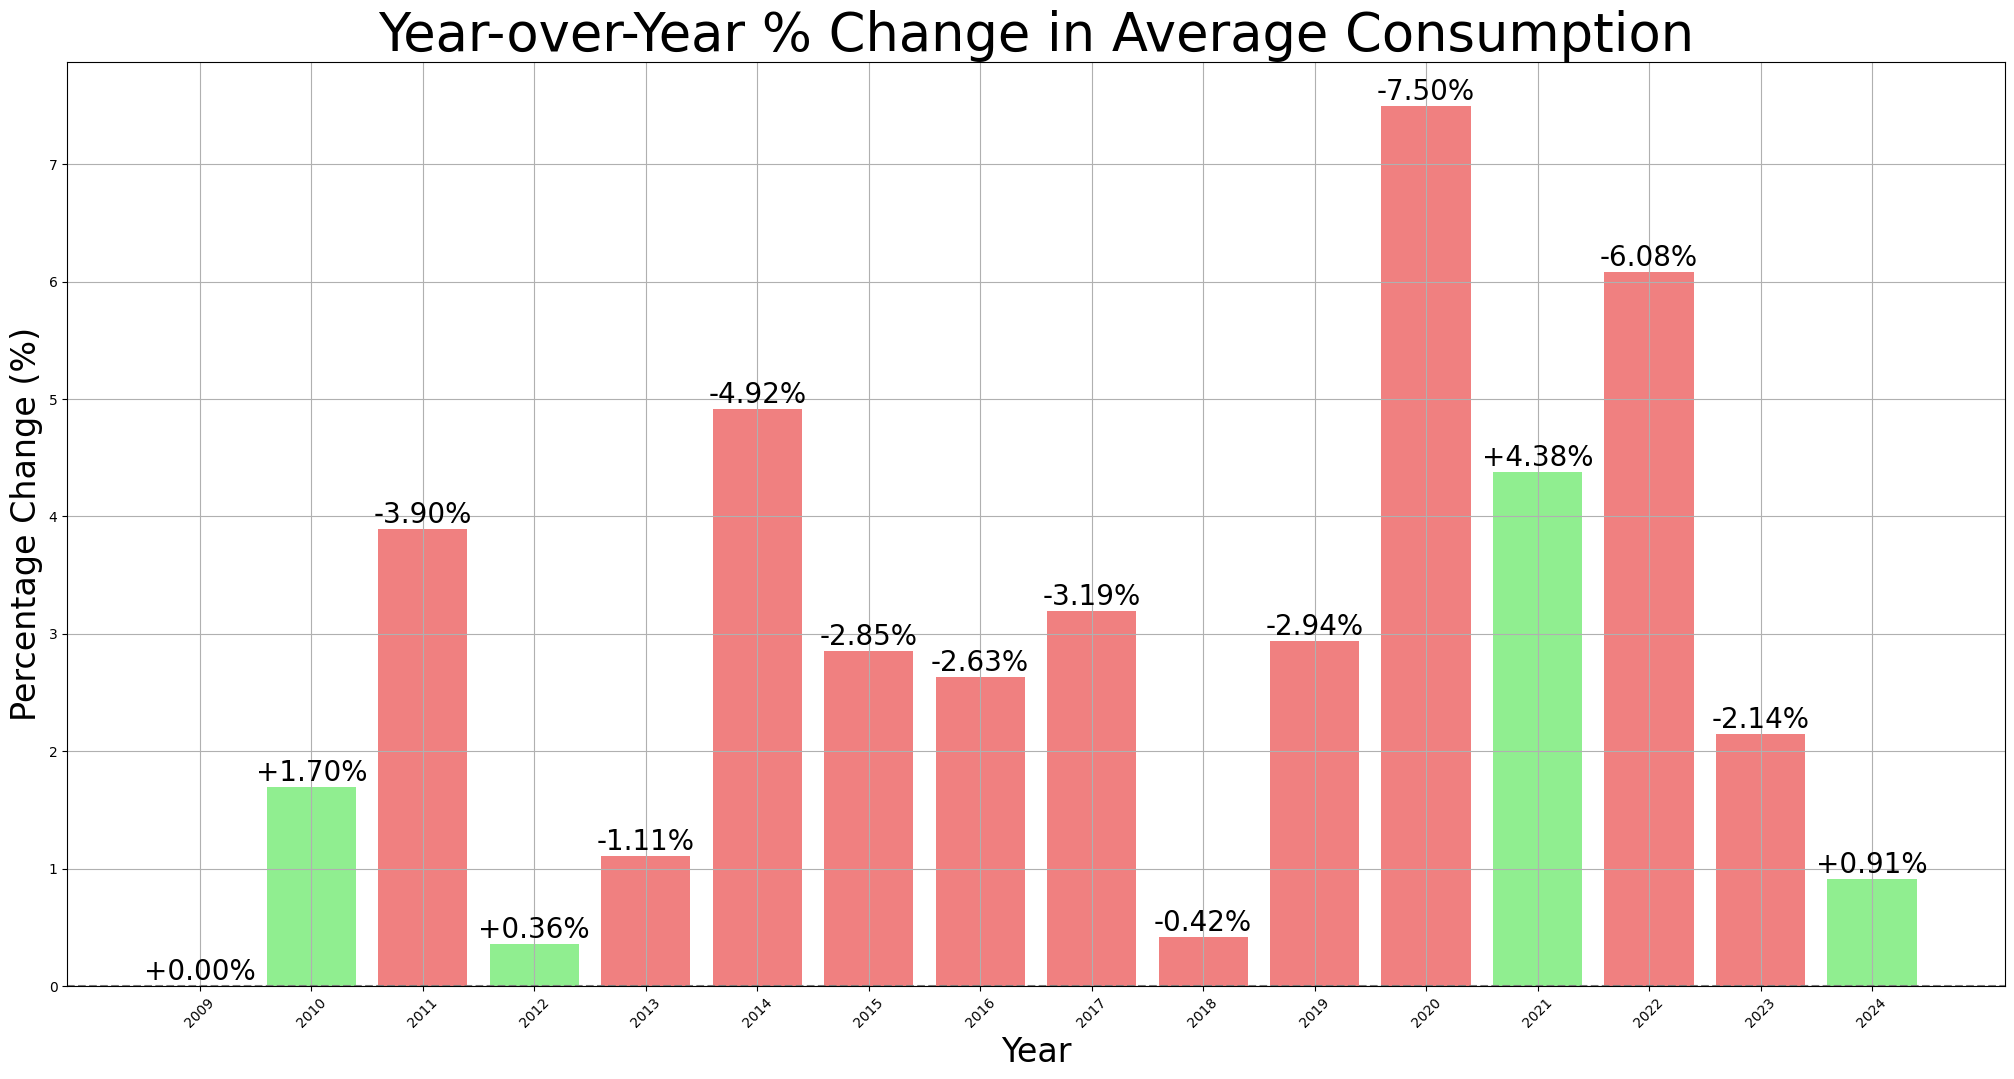

In [94]:
# Year-over-Year Percentage Change in Consumption
pct_change = yearly_avg.pct_change().fillna(0) * 100  # in percentage
abs_pct = pct_change.abs()  # Always positive for plotting

plt.figure(figsize=(25, 12))
bars03 = plt.bar(years, abs_pct, color=['lightgreen' if x >= 0 else 'lightcoral' for x in pct_change])

# Add percentage labels (show actual +/- values even though bars are always positive)
for bar, pct in zip(bars03, pct_change):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{pct:+.2f}%', ha='center', va='bottom', fontsize=20)

plt.xlabel('Year', fontsize=24)
plt.ylabel('Percentage Change (%)', fontsize=24)
plt.title('Year-over-Year % Change in Average Consumption', fontsize=38)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(years, rotation=45)

plt.grid()
plt.show()

# Detail Comparision

<Figure size 3000x1200 with 0 Axes>

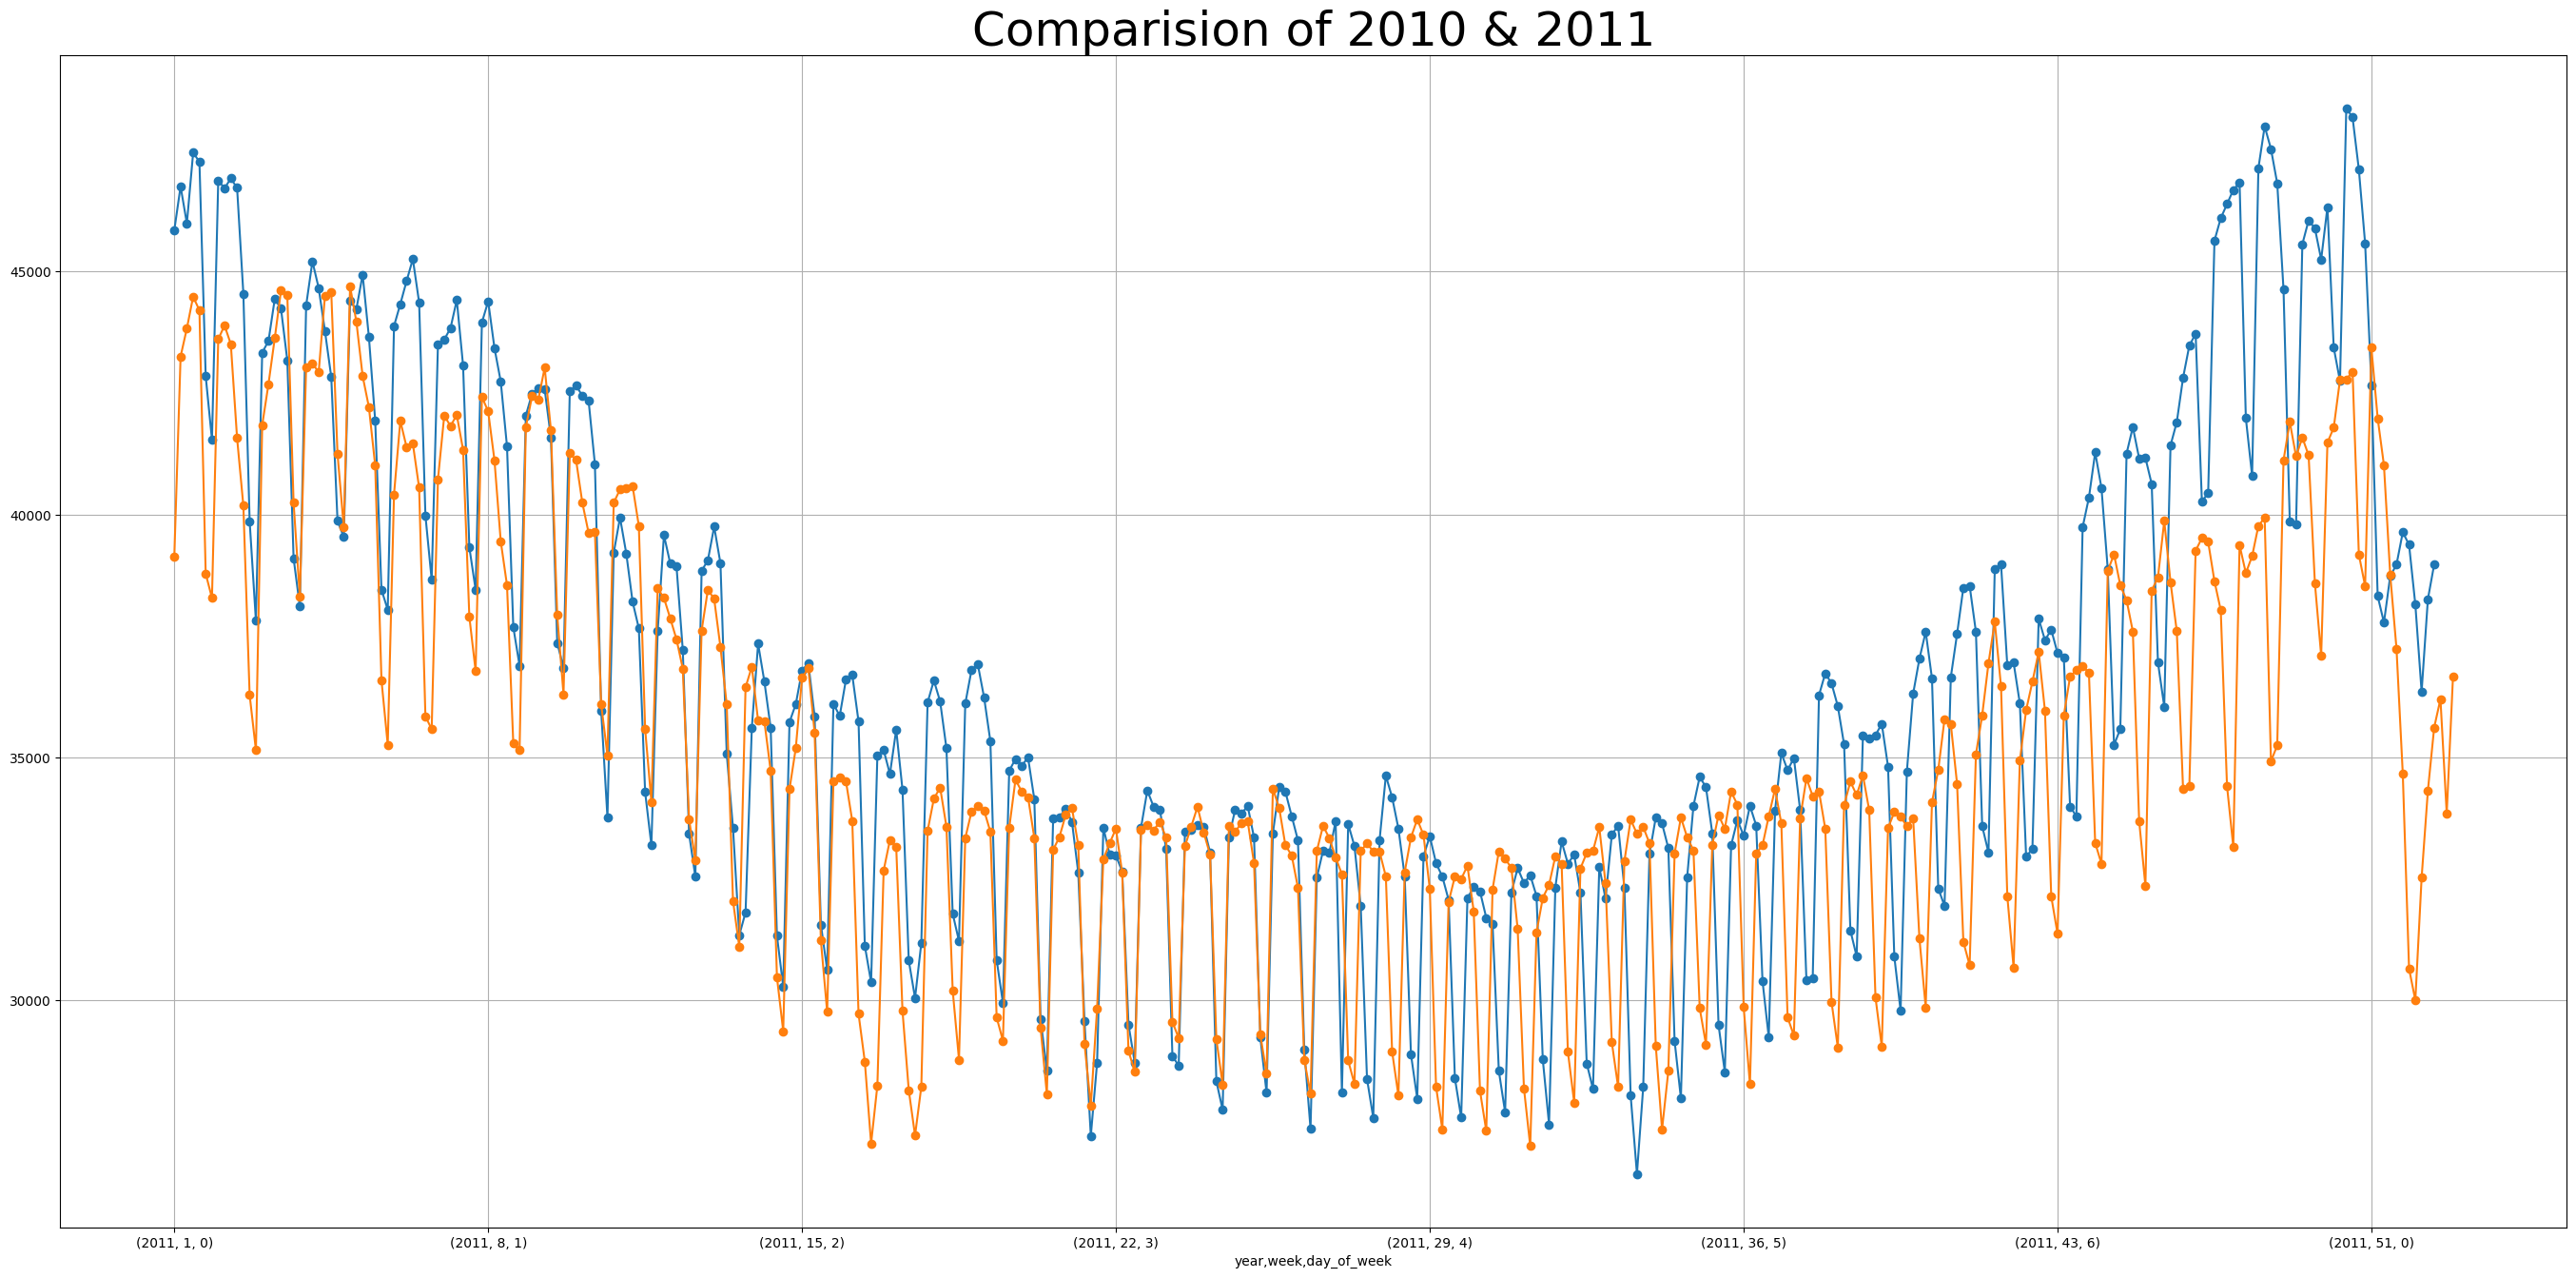

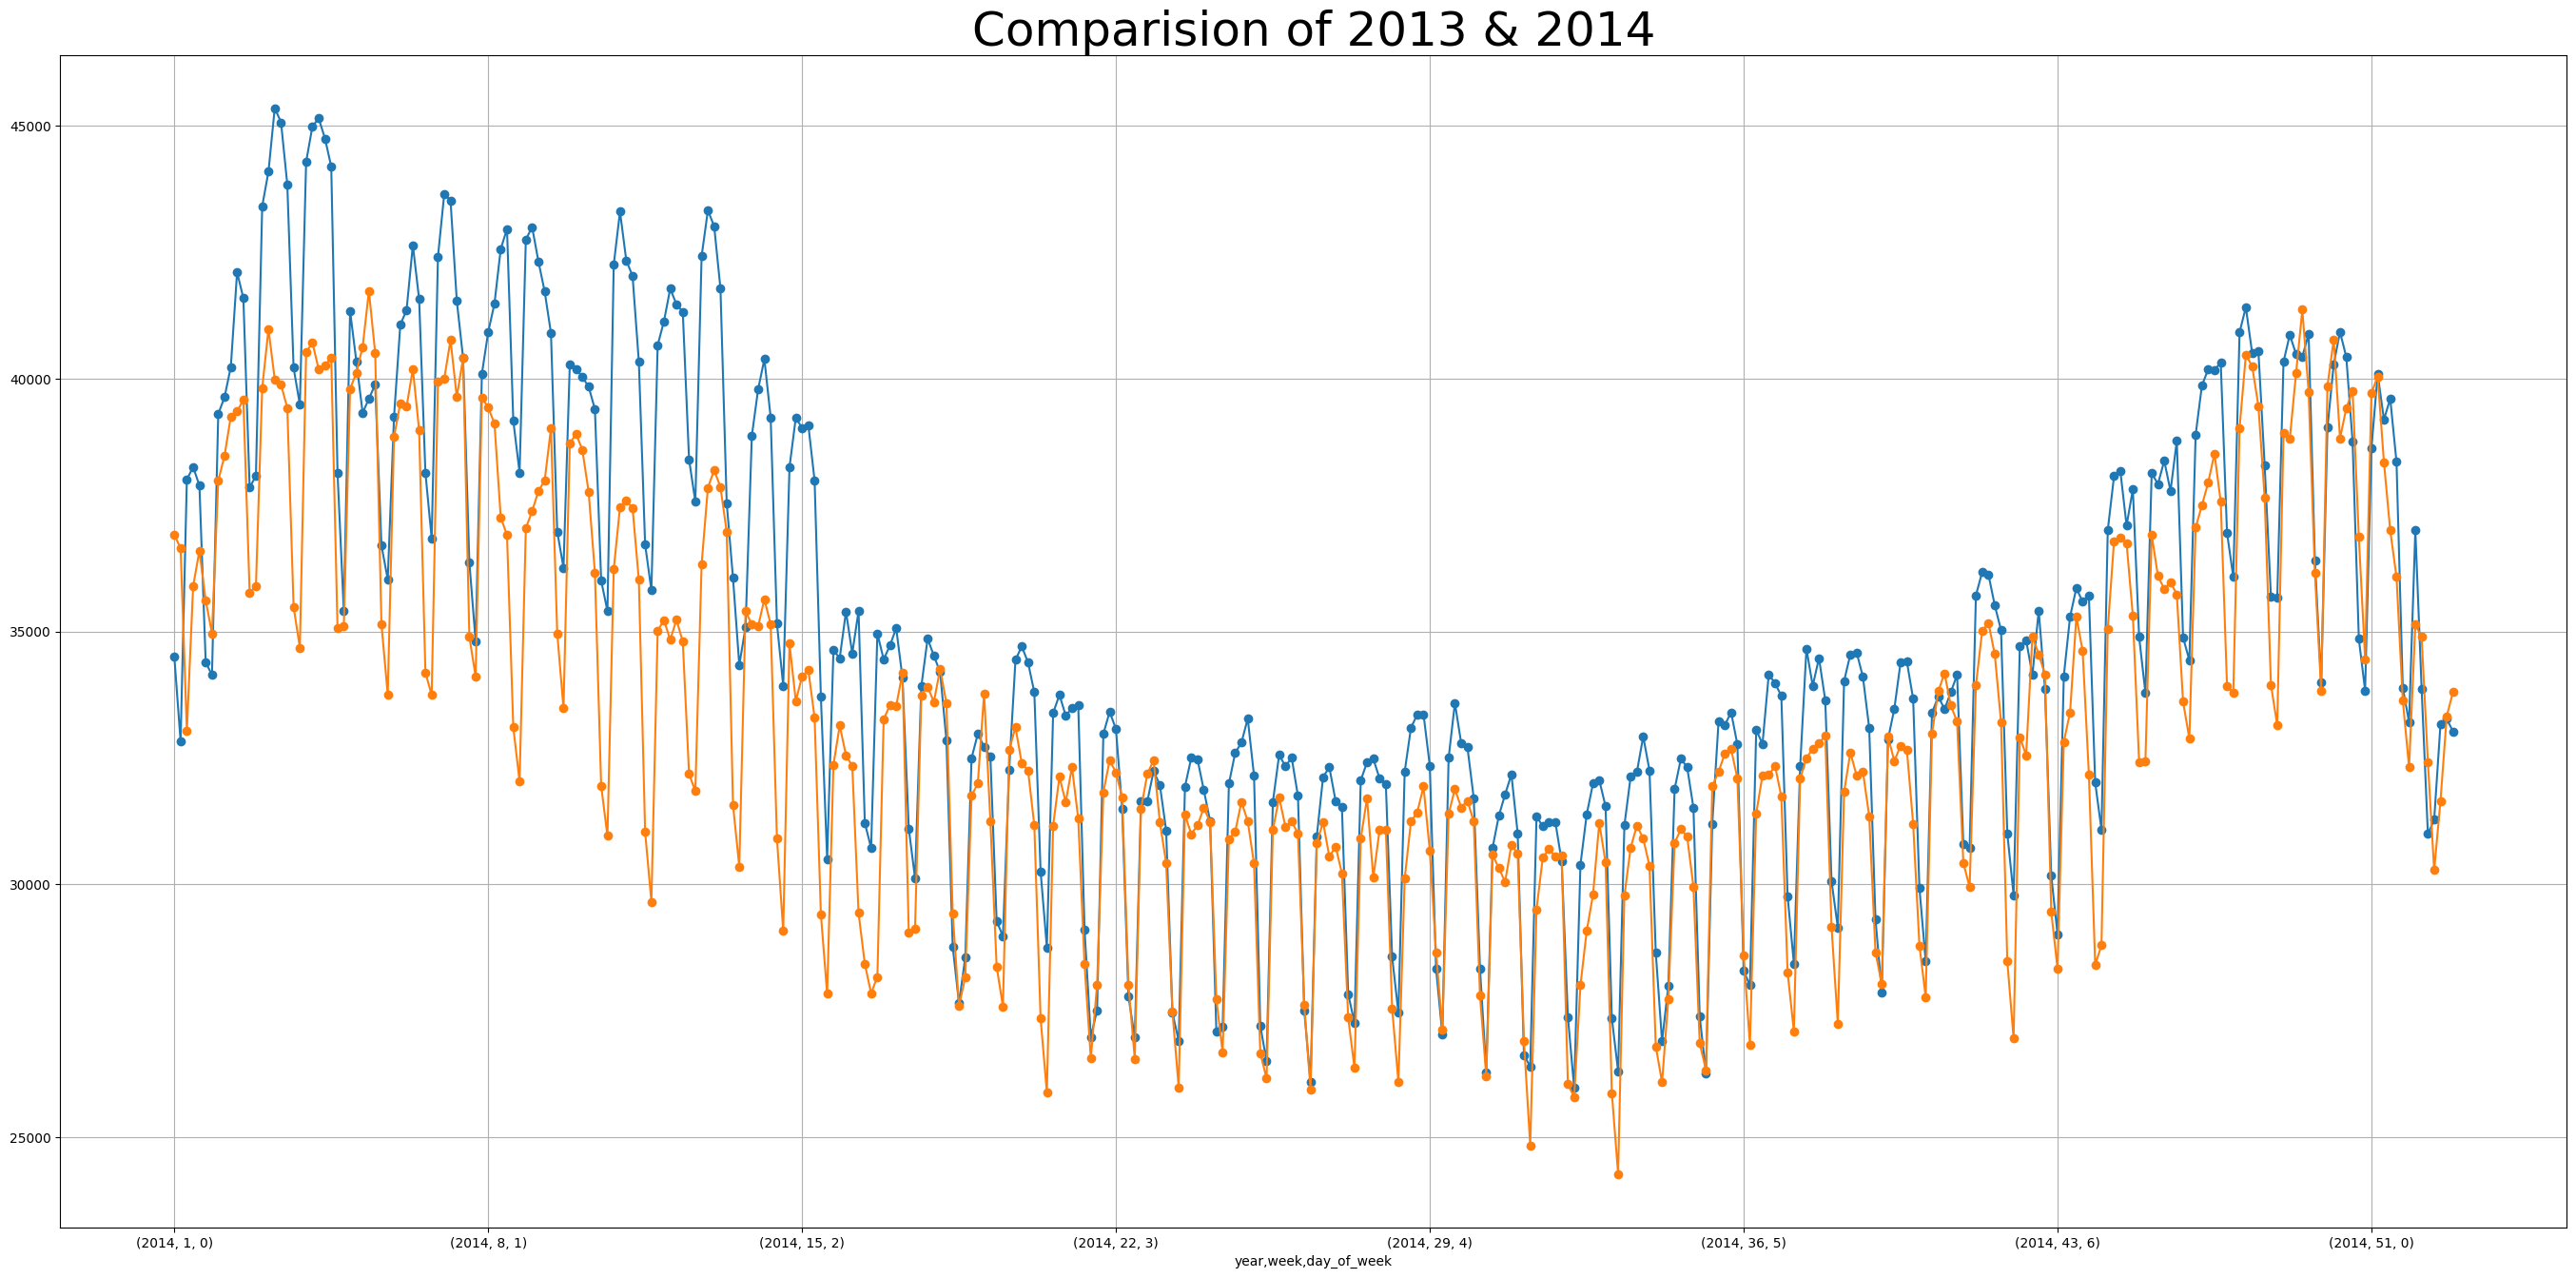

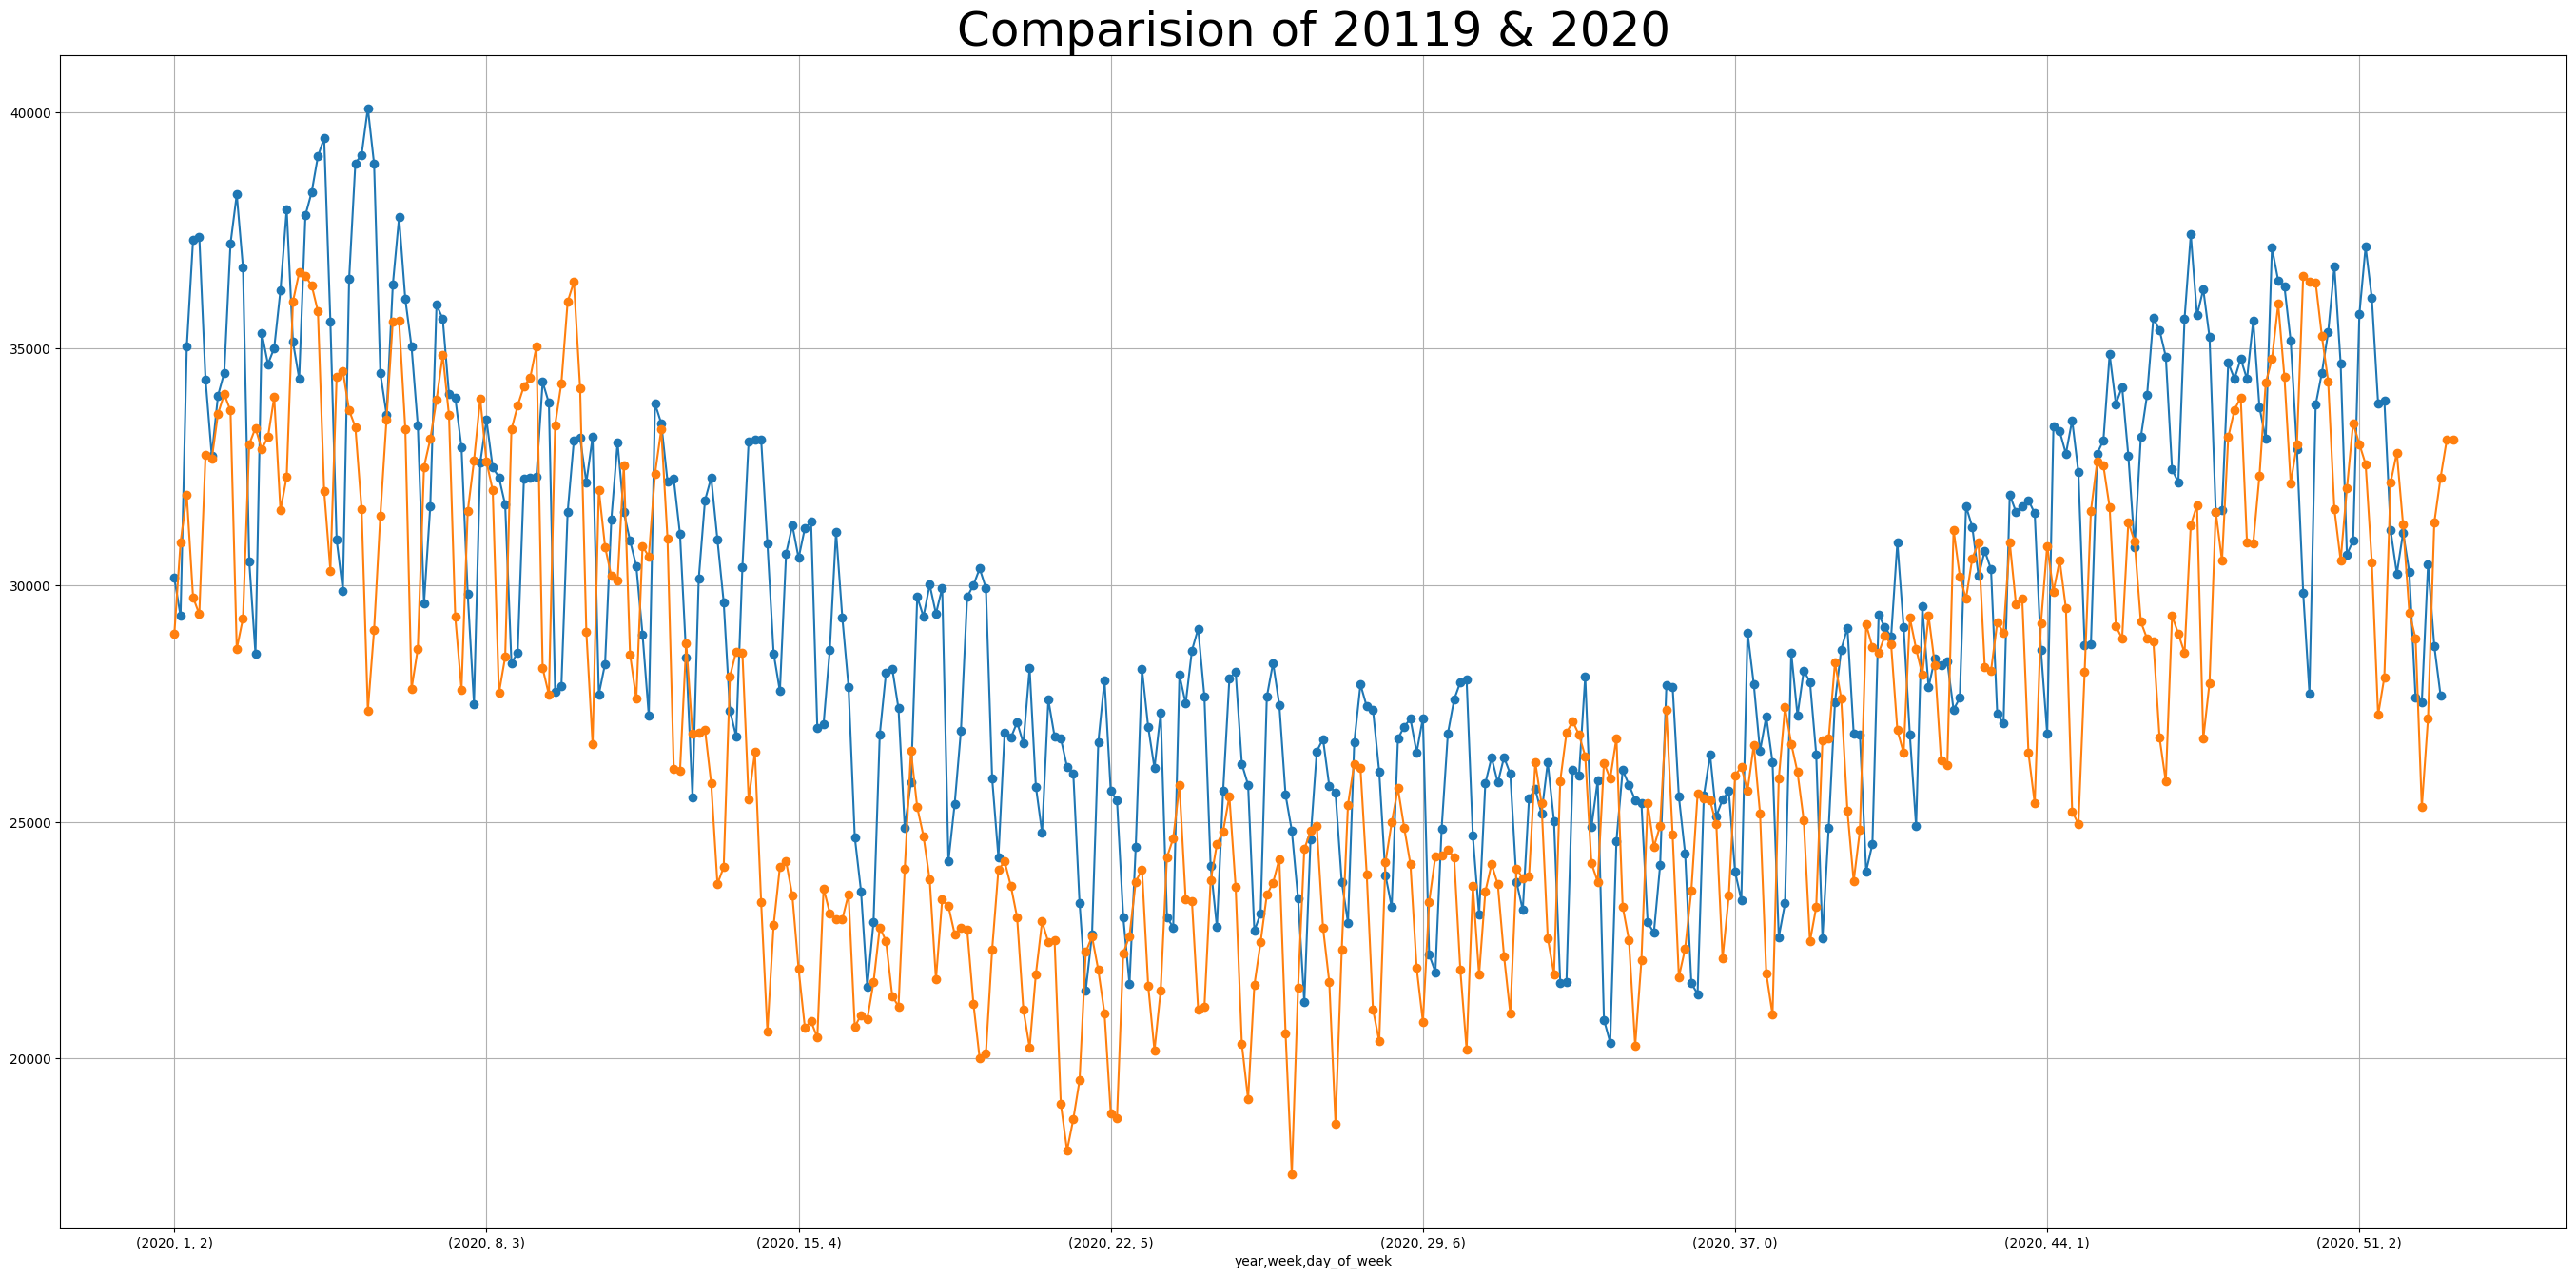

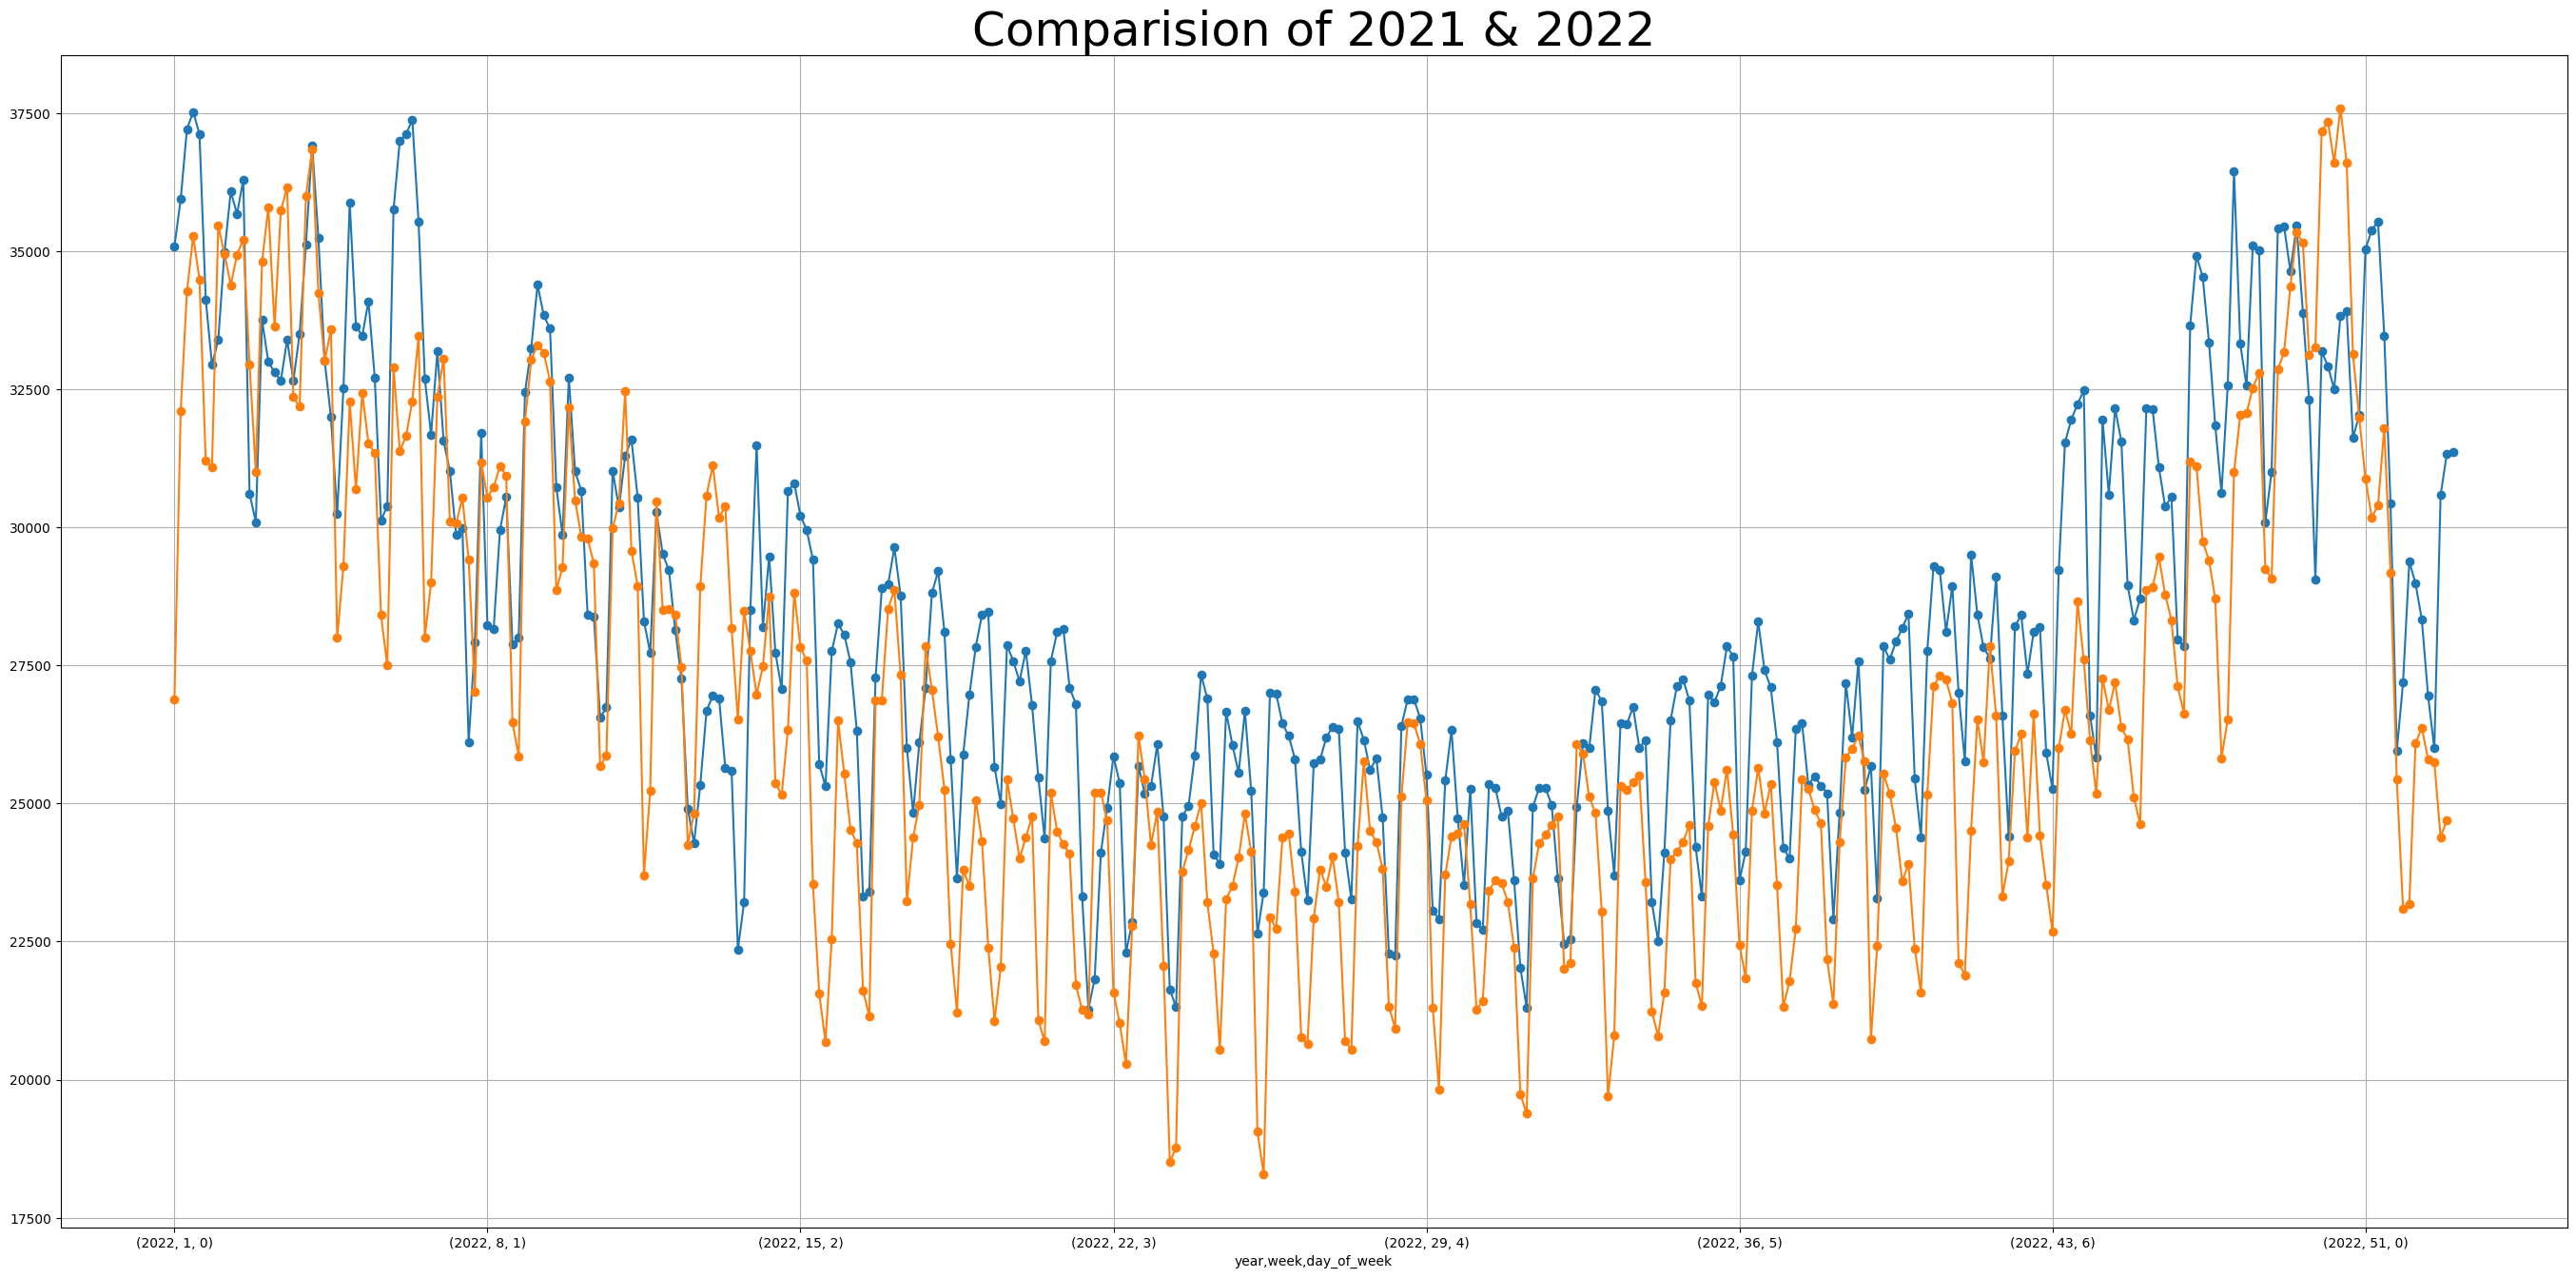

In [95]:
# Can only plot one year with different days of week

plt.figure(figsize=(30, 12))
Weekly_plot =  final_data.groupby([ 'year', 'week', 'day_of_week'])['nd'].mean()

fig, ax = plt.subplots(figsize=(34, 16))
Weekly_plot.loc[[2010]].plot(marker='o', ax=ax, label='year')
Weekly_plot.loc[[2011]].plot(marker='o', ax=ax, label='year')
plt.title('Comparision of 2010 & 2011', fontsize=36)
plt.grid(True)

fig, ax = plt.subplots(figsize=(34, 16))
Weekly_plot.loc[[2013]].plot(marker='o', ax=ax, label='year')
Weekly_plot.loc[[2014]].plot(marker='o', ax=ax, label='year')
plt.title('Comparision of 2013 & 2014', fontsize=36)
plt.grid(True)

fig, ax = plt.subplots(figsize=(34, 16))
Weekly_plot.loc[[2019]].plot(marker='o', ax=ax, label='year')
Weekly_plot.loc[[2020]].plot(marker='o', ax=ax, label='year')
plt.title('Comparision of 20119 & 2020', fontsize=36)
plt.grid(True)

fig, ax = plt.subplots(figsize=(34, 16))
Weekly_plot.loc[[2021]].plot(marker='o', ax=ax, label='year')
Weekly_plot.loc[[2022]].plot(marker='o', ax=ax, label='year')
plt.title('Comparision of 2021 & 2022', fontsize=36)
plt.grid(True)

plt.show()

# Average Demand by Season

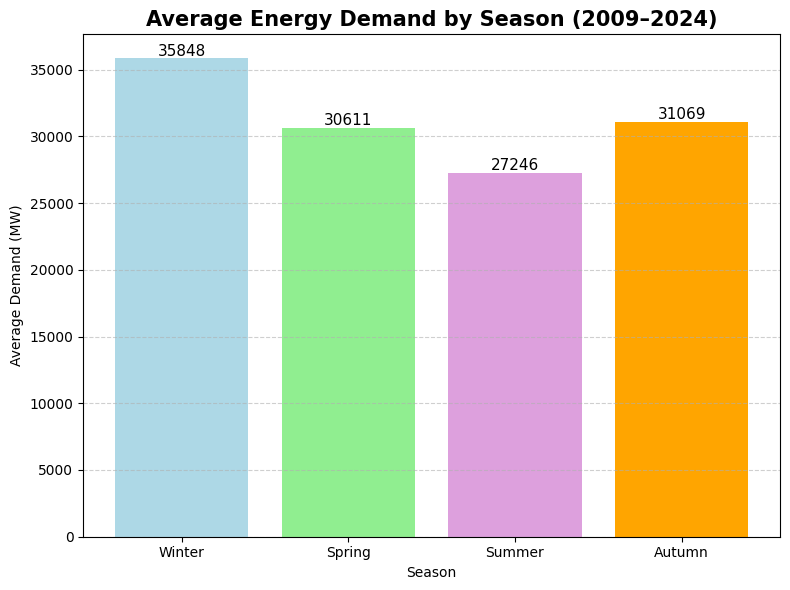

In [96]:
# Resample to daily average demand
daily = final_data['nd'].resample('D').mean().dropna()
daily_df = daily.to_frame(name='demand')
daily_df['month'] = daily_df.index.month

# Assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

daily_df['season'] = daily_df['month'].apply(get_season)

# Group by season
season_avg = daily_df.groupby('season')['demand'].mean()

# Order the seasons correctly
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_avg = season_avg.reindex(season_order)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(season_avg.index, season_avg.values, color=['lightblue', 'lightgreen', 'plum', 'orange'])

# Label the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{yval:.0f}', ha='center', fontsize=11)

plt.title("Average Energy Demand by Season (2009–2024)", fontsize=15, weight='bold')
plt.xlabel("Season")  # X-axis = Seasons
plt.ylabel("Average Demand (MW)")  # Y-axis = Avg daily demand in megawatts
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Breakdown of Season Demand

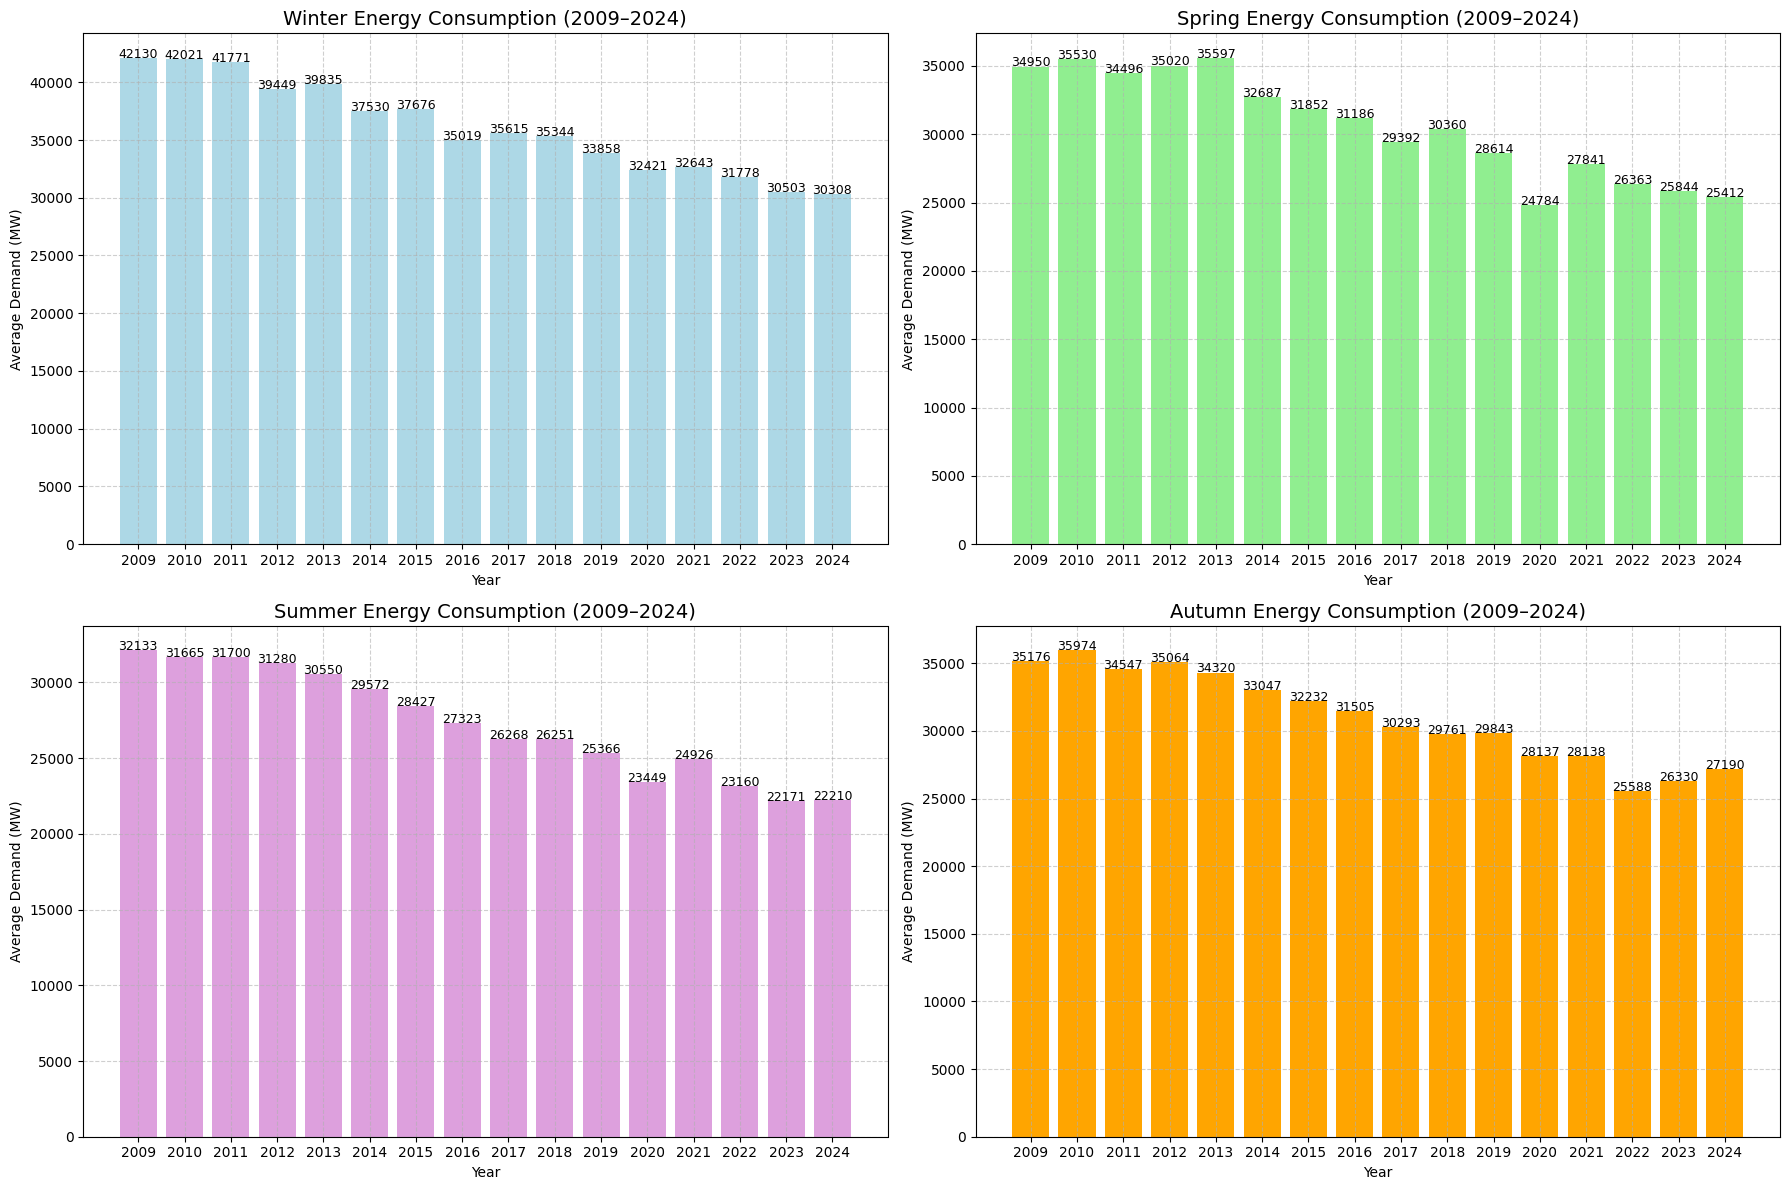

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

df = final_data.dropna(subset=['nd'])

# WINTER: Dec (previous year) + Jan, Feb (current year)
df['winter_year'] = df.apply(
    lambda row: row['year'] + 1 if row['month'] == 12 else row['year'], axis=1)
winter_df = df[df['month'].isin([12, 1, 2])]
winter_avg = winter_df.groupby('winter_year')['nd'].mean().loc[2009:2024]

# SPRING: Mar, Apr, May
spring_df = df[df['month'].isin([3, 4, 5])]
spring_avg = spring_df.groupby('year')['nd'].mean().loc[2009:2024]

# SUMMER: Jun, Jul, Aug
summer_df = df[df['month'].isin([6, 7, 8])]
summer_avg = summer_df.groupby('year')['nd'].mean().loc[2009:2024]

# AUTUMN: Sep, Oct, Nov
autumn_df = df[df['month'].isin([9, 10, 11])]
autumn_avg = autumn_df.groupby('year')['nd'].mean().loc[2009:2024]

seasons = {
    'Winter': winter_avg,
    'Spring': spring_avg,
    'Summer': summer_avg,
    'Autumn': autumn_avg
}

colors = ['lightblue', 'lightgreen', 'plum', 'orange']
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

for i, (season, data) in enumerate(seasons.items()):
    ax = axes[i]
    ax.bar(data.index.astype(str), data.values, color=colors[i])
    ax.set_title(f'{season} Energy Consumption (2009–2024)', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Demand (MW)')
    ax.grid(True, linestyle='--', alpha=0.6)

    for j, value in enumerate(data.values):
        ax.text(j, value + 5, f'{value:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Wind + Solar Generation

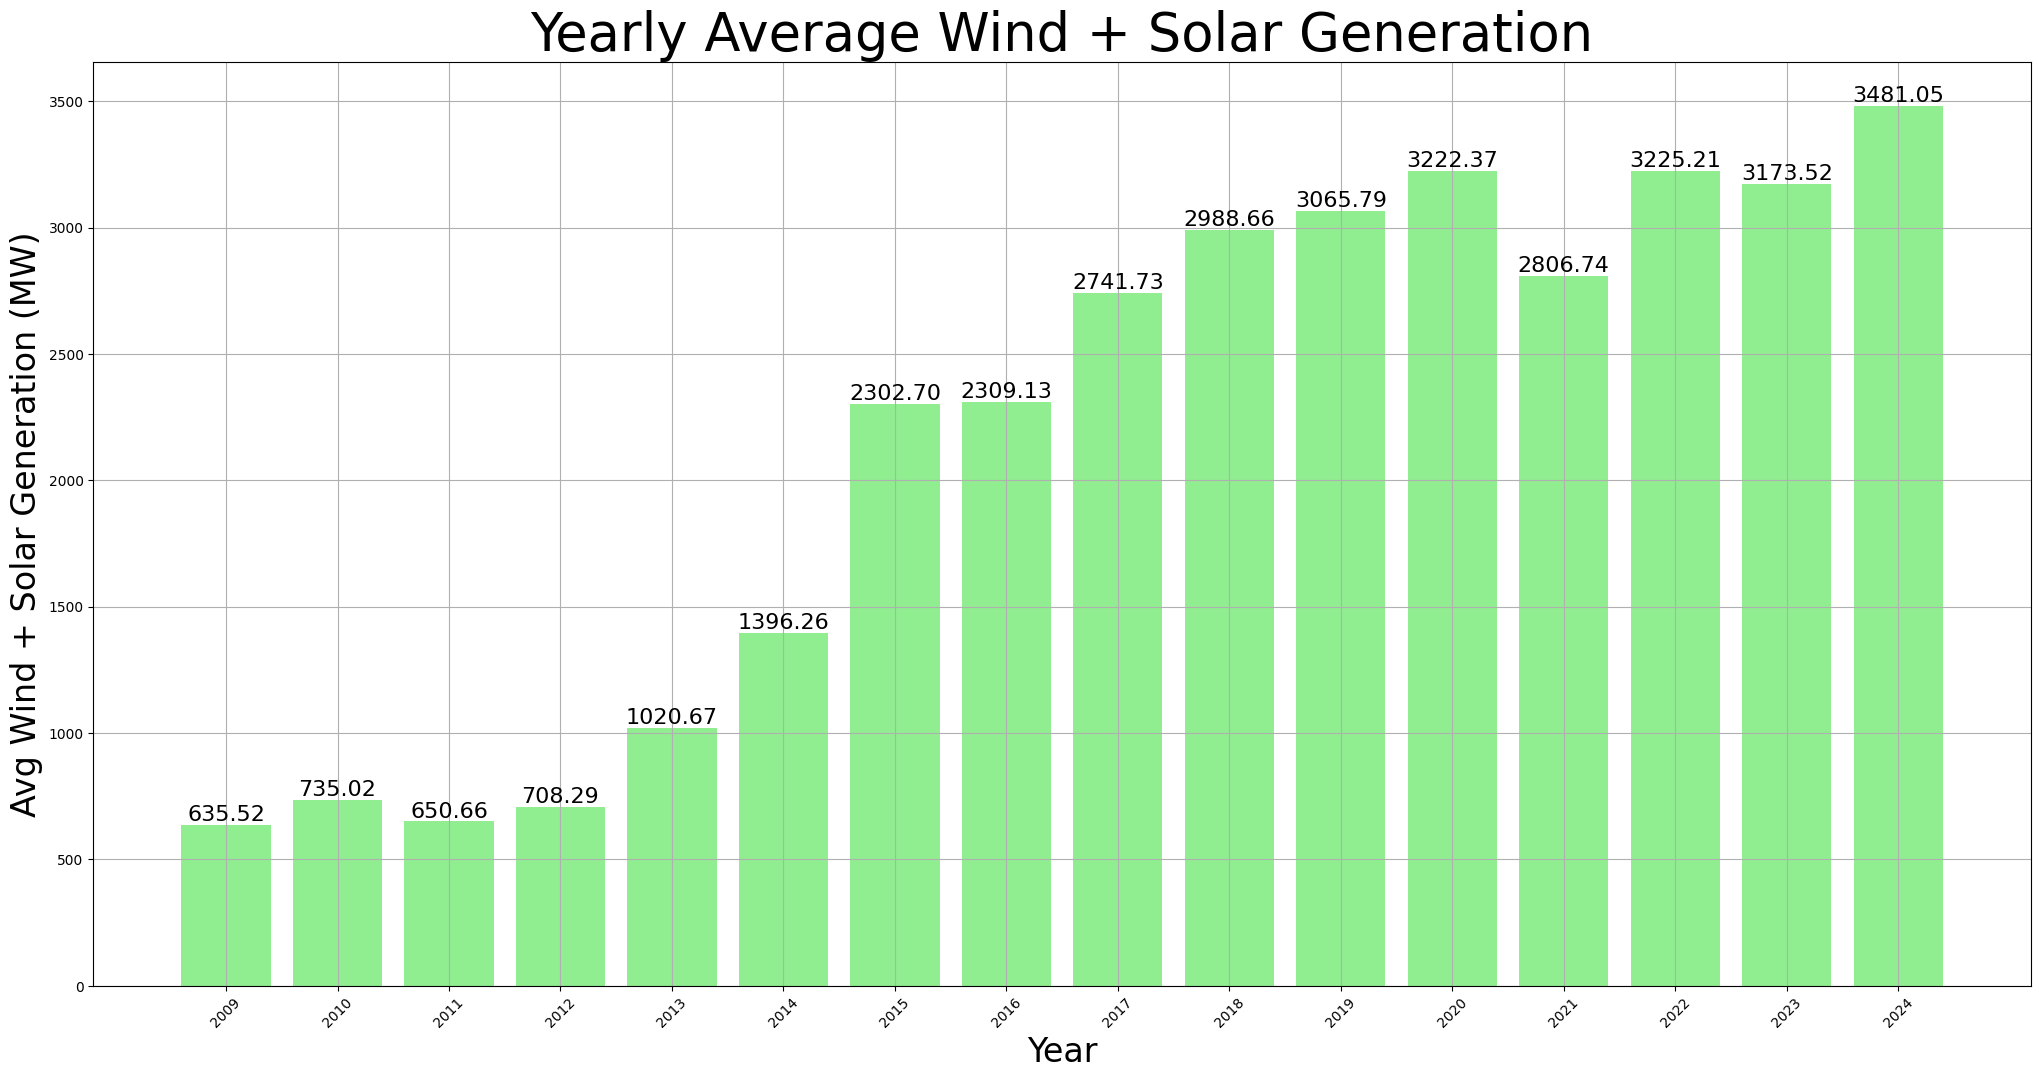

In [98]:
# Yearly Average Wind + Solar Generation
wind_solar_avg = final_data['wind + solar generation'].resample('YE').mean()

plt.figure(figsize=(25, 12))
bars02 = plt.bar(wind_solar_avg.index.year, wind_solar_avg, color='lightgreen')

# Add value labels
for bar in bars02:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=16)

plt.xlabel('Year', fontsize=24)
plt.ylabel('Avg Wind + Solar Generation (MW)', fontsize=24)
plt.title('Yearly Average Wind + Solar Generation', fontsize=38)
plt.xticks(years, rotation=45)
plt.grid()

# Wind Generation

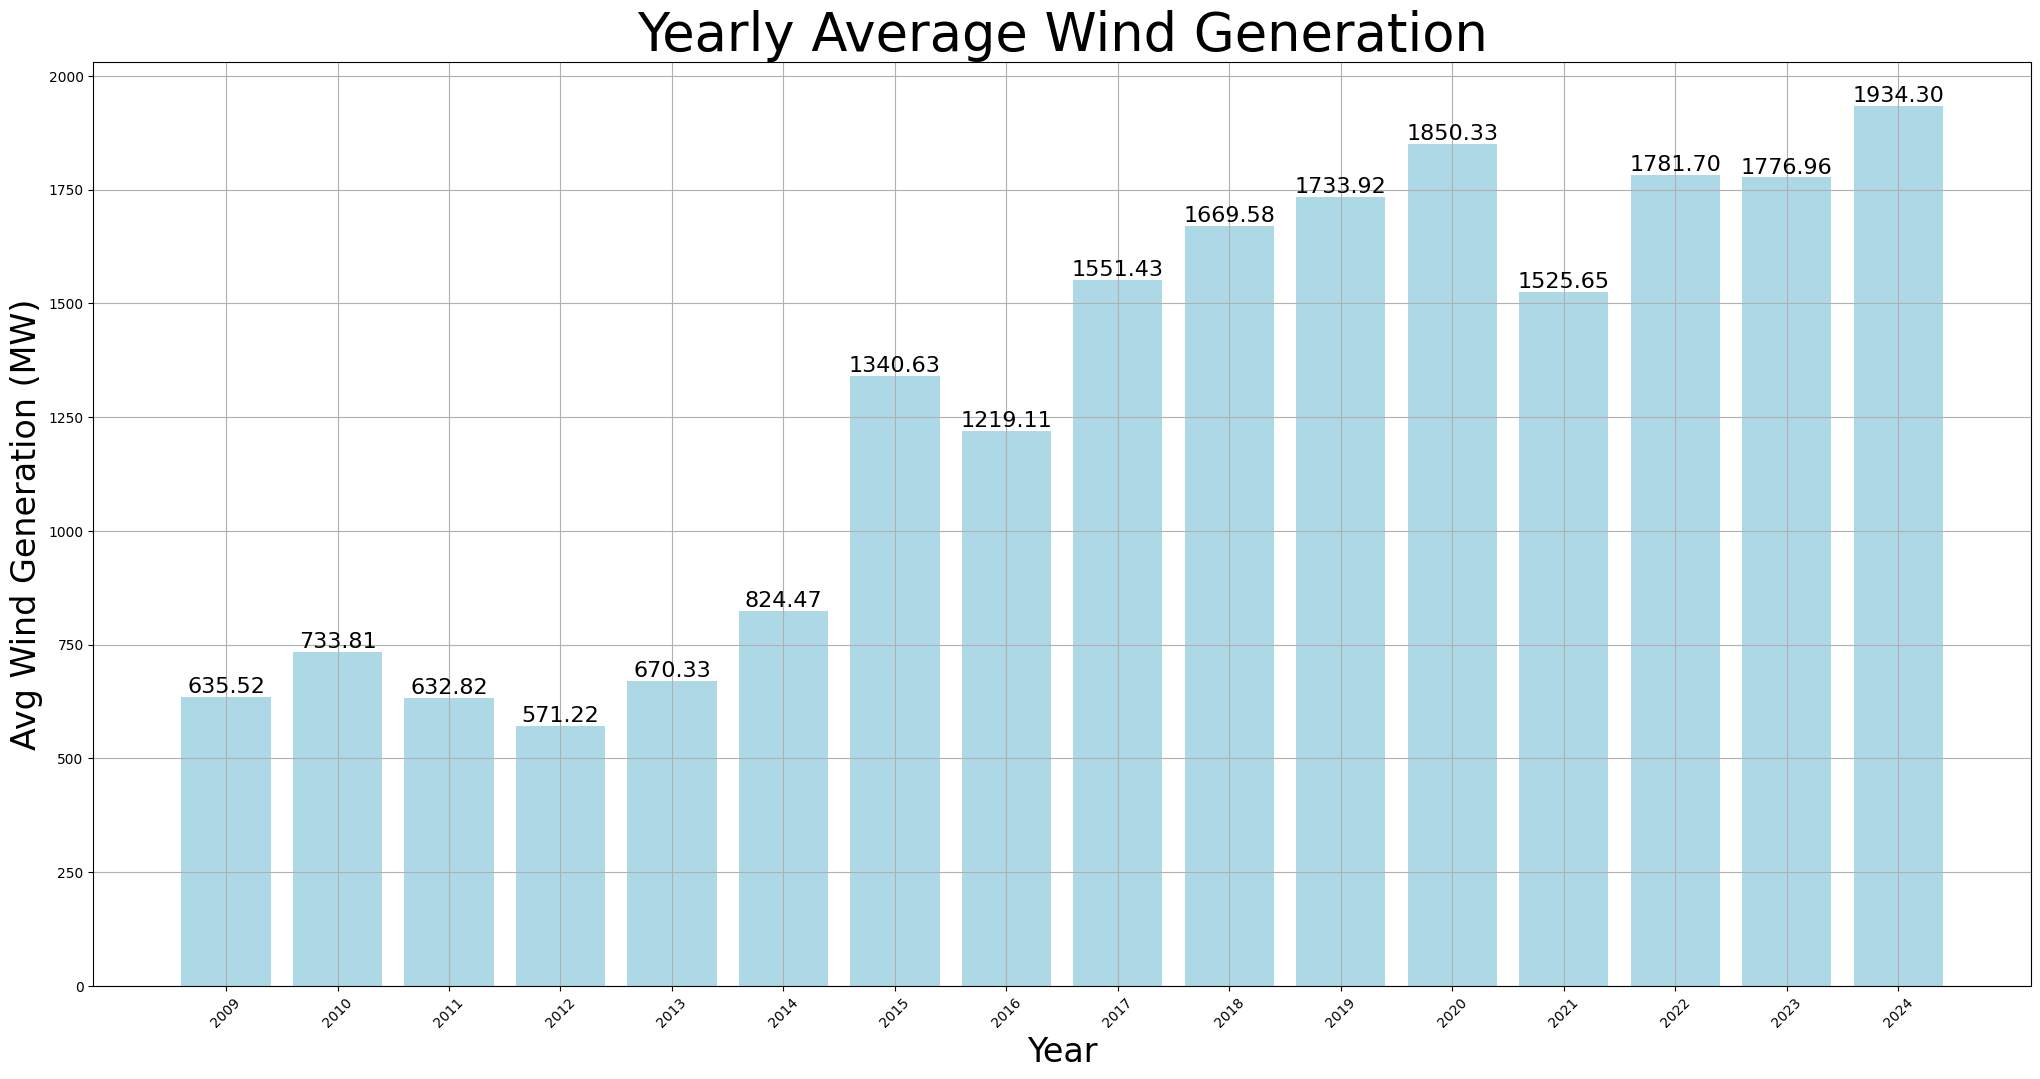

In [99]:
wind_avg = final_data['embedded_wind_generation'].resample('YE').mean()

plt.figure(figsize=(25, 12))
bars03 = plt.bar(wind_avg.index.year, wind_avg, color='lightblue')

# Add value labels
for bar in bars03:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=16)

plt.xlabel('Year', fontsize=24)
plt.ylabel('Avg Wind Generation (MW)', fontsize=24)
plt.title('Yearly Average Wind Generation', fontsize=38)
plt.xticks(years, rotation=45)
plt.grid()
plt.show()


# Wind Generation

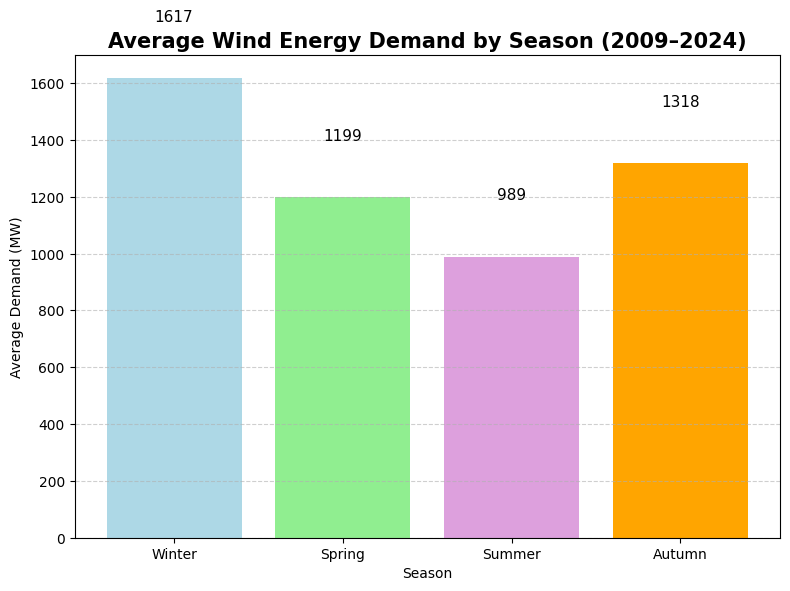

In [100]:
# Resample to daily average demand
daily = final_data['embedded_wind_generation'].resample('D').mean().dropna()
daily_df = daily.to_frame(name='demand')
daily_df['month'] = daily_df.index.month

# Assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

daily_df['season'] = daily_df['month'].apply(get_season)

# Group by season
season_avg = daily_df.groupby('season')['demand'].mean()

# Order the seasons correctly
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_avg = season_avg.reindex(season_order)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(season_avg.index, season_avg.values, color=['lightblue', 'lightgreen', 'plum', 'orange'])

# Label the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{yval:.0f}', ha='center', fontsize=11)

plt.title("Average Wind Energy Demand by Season (2009–2024)", fontsize=15, weight='bold')
plt.xlabel("Season")  # X-axis = Seasons
plt.ylabel("Average Demand (MW)")  # Y-axis = Avg daily demand in megawatts
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Seasonal Breakdown of Wind Generation

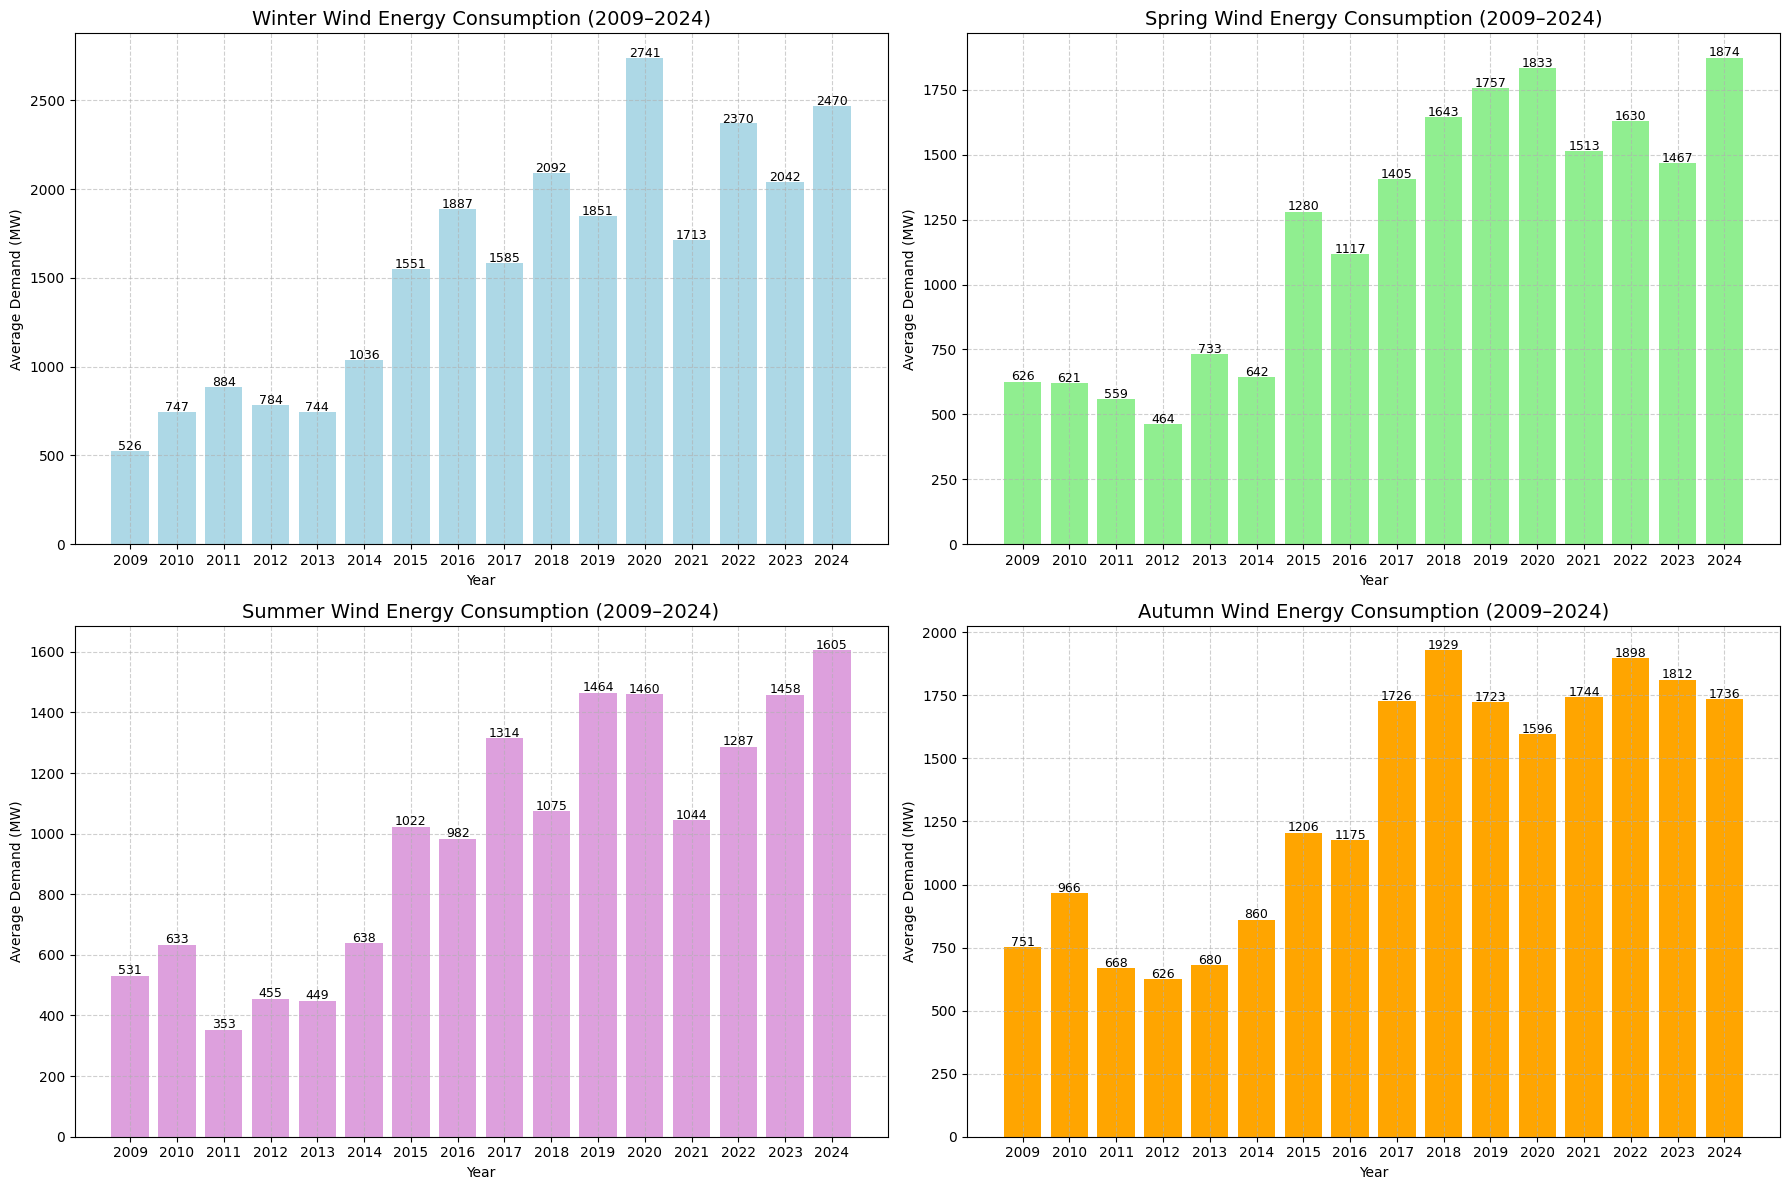

In [101]:
df = final_data.dropna(subset=['embedded_wind_generation'])

# WINTER: Dec (previous year) + Jan, Feb (current year)
df['winter_year'] = df.apply(
    lambda row: row['year'] + 1 if row['month'] == 12 else row['year'], axis=1)
winter_df = df[df['month'].isin([12, 1, 2])]
winter_avg = winter_df.groupby('winter_year')['embedded_wind_generation'].mean().loc[2009:2024]

# SPRING: Mar, Apr, May
spring_df = df[df['month'].isin([3, 4, 5])]
spring_avg = spring_df.groupby('year')['embedded_wind_generation'].mean().loc[2009:2024]

# SUMMER: Jun, Jul, Aug 
summer_df = df[df['month'].isin([6, 7, 8])]
summer_avg = summer_df.groupby('year')['embedded_wind_generation'].mean().loc[2009:2024]

# AUTUMN: Sep, Oct, Nov
autumn_df = df[df['month'].isin([9, 10, 11])]
autumn_avg = autumn_df.groupby('year')['embedded_wind_generation'].mean().loc[2009:2024]

seasons = {
    'Winter': winter_avg,
    'Spring': spring_avg,
    'Summer': summer_avg,
    'Autumn': autumn_avg
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

colors = ['lightblue', 'lightgreen', 'plum', 'orange']
for i, (season, data) in enumerate(seasons.items()):
    ax = axes[i]
    ax.bar(data.index.astype(str), data.values, color=colors[i])
    ax.set_title(f'{season} Wind Energy Consumption (2009–2024)', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Demand (MW)')
    ax.grid(True, linestyle='--', alpha=0.6)
    
    for j, value in enumerate(data.values):
        ax.text(j, value + 5, f'{value:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Solar Generation

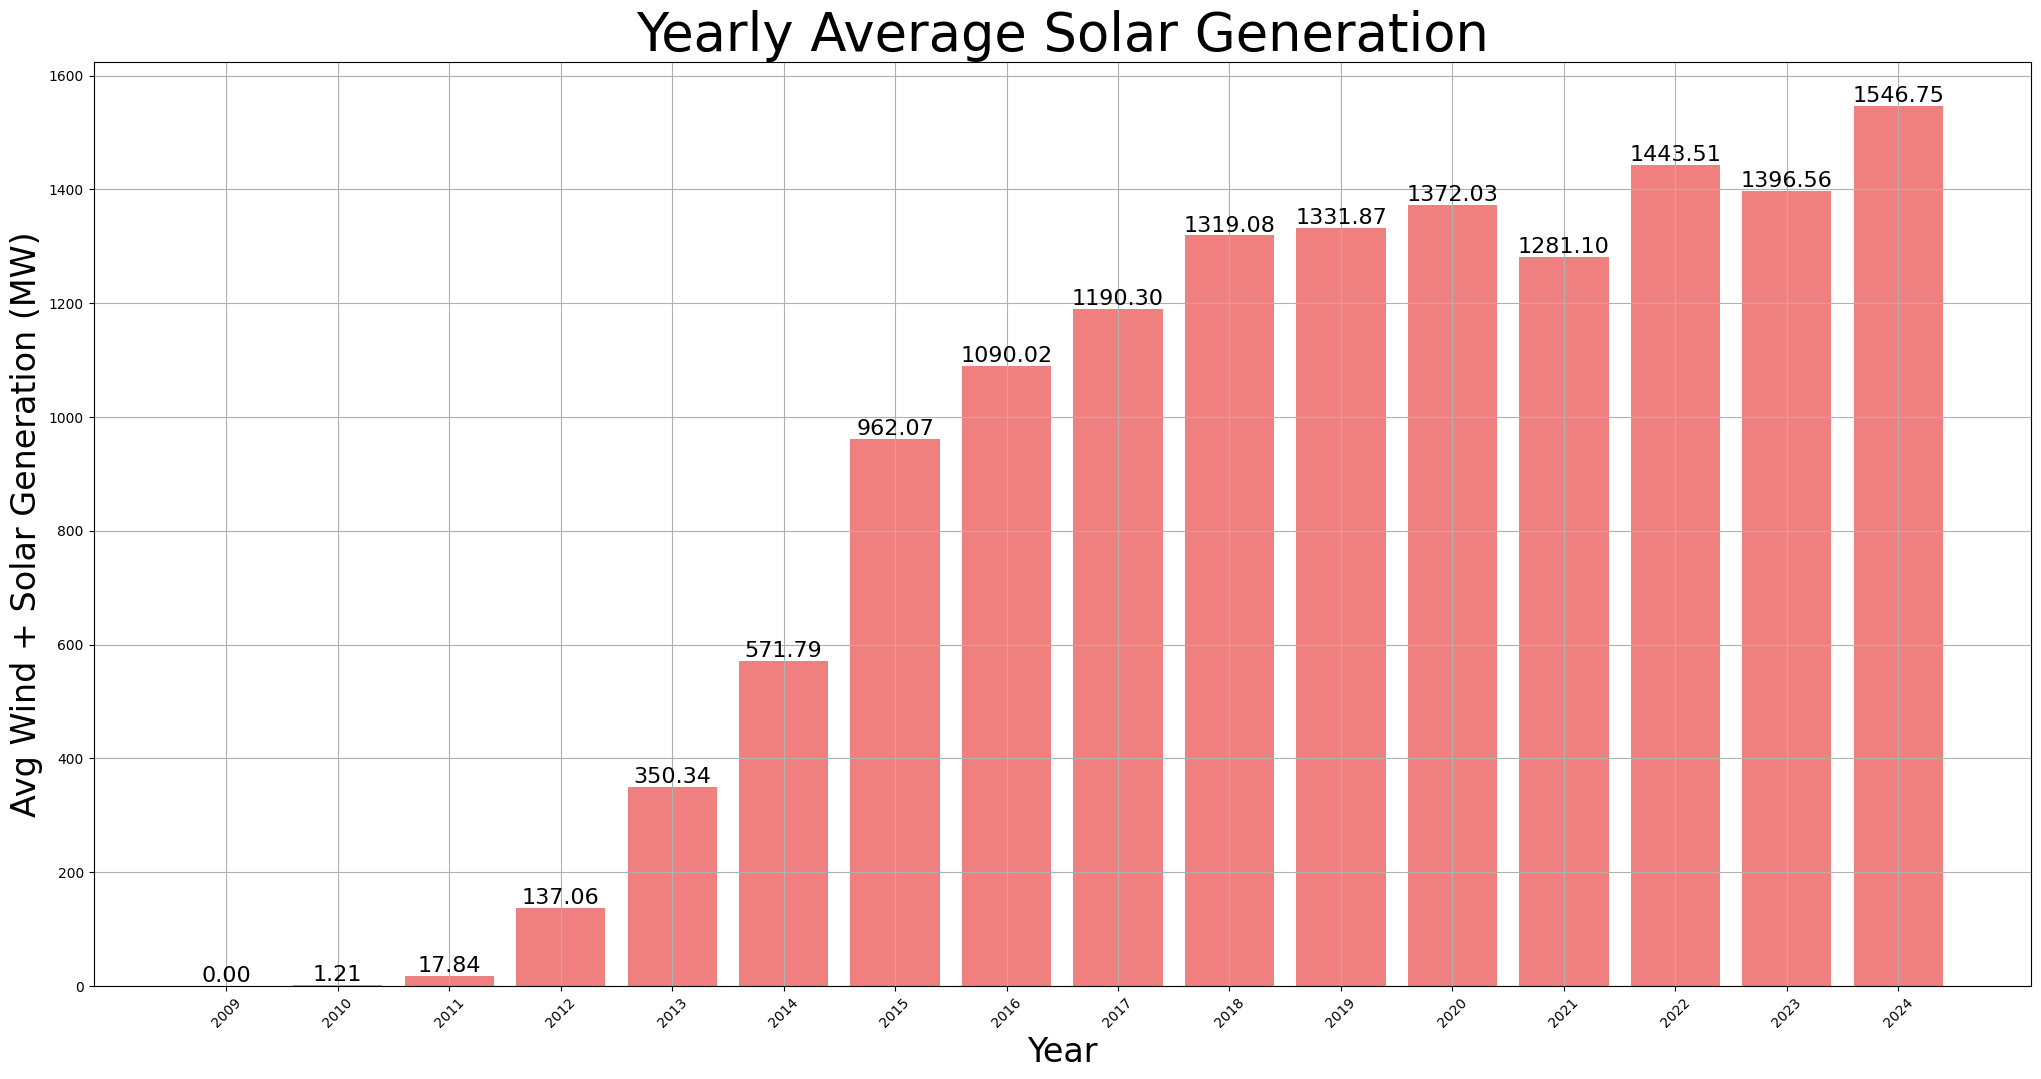

In [102]:
solar_avg = final_data['embedded_solar_generation'].resample('YE').mean()

plt.figure(figsize=(25, 12))
bars04 = plt.bar(solar_avg.index.year, solar_avg, color='lightcoral')

# Add value labels
for bar in bars04:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', ha='center', va='bottom', fontsize=16)

plt.xlabel('Year', fontsize=24)
plt.ylabel('Avg Wind + Solar Generation (MW)', fontsize=24)
plt.title('Yearly Average Solar Generation', fontsize=38)
plt.xticks(years, rotation=45)
plt.grid()
plt.show()

# Seasonal Solar Generation

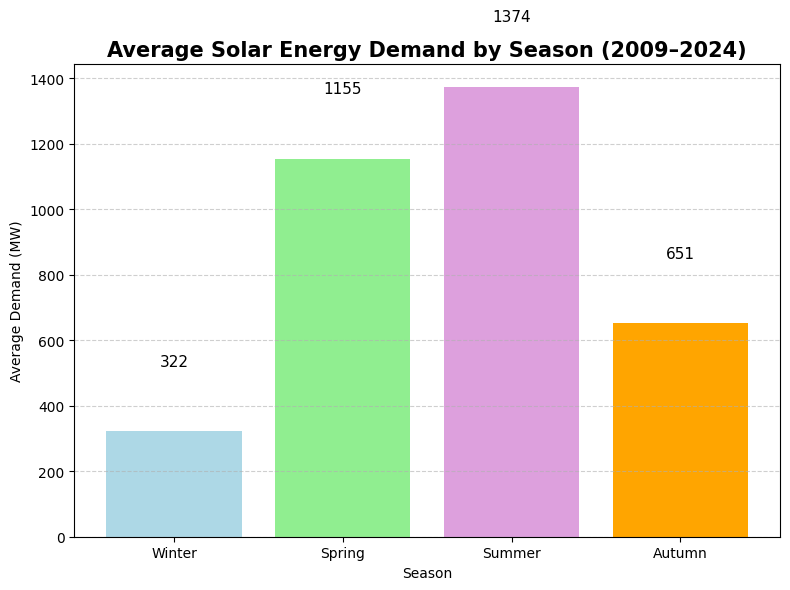

In [103]:
# Resample to daily average demand
daily = final_data['embedded_solar_generation'].resample('D').mean().dropna()
daily_df = daily.to_frame(name='demand')
daily_df['month'] = daily_df.index.month

# Assign seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

daily_df['season'] = daily_df['month'].apply(get_season)

# Group by season
season_avg = daily_df.groupby('season')['demand'].mean()

# Order the seasons correctly
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
season_avg = season_avg.reindex(season_order)

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(season_avg.index, season_avg.values, color=['lightblue', 'lightgreen', 'plum', 'orange'])

# Label the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, f'{yval:.0f}', ha='center', fontsize=11)

plt.title("Average Solar Energy Demand by Season (2009–2024)", fontsize=15, weight='bold')
plt.xlabel("Season")  # X-axis = Seasons
plt.ylabel("Average Demand (MW)")  # Y-axis = Avg daily demand in megawatts
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Seasonal Breakdown of Solar Generation

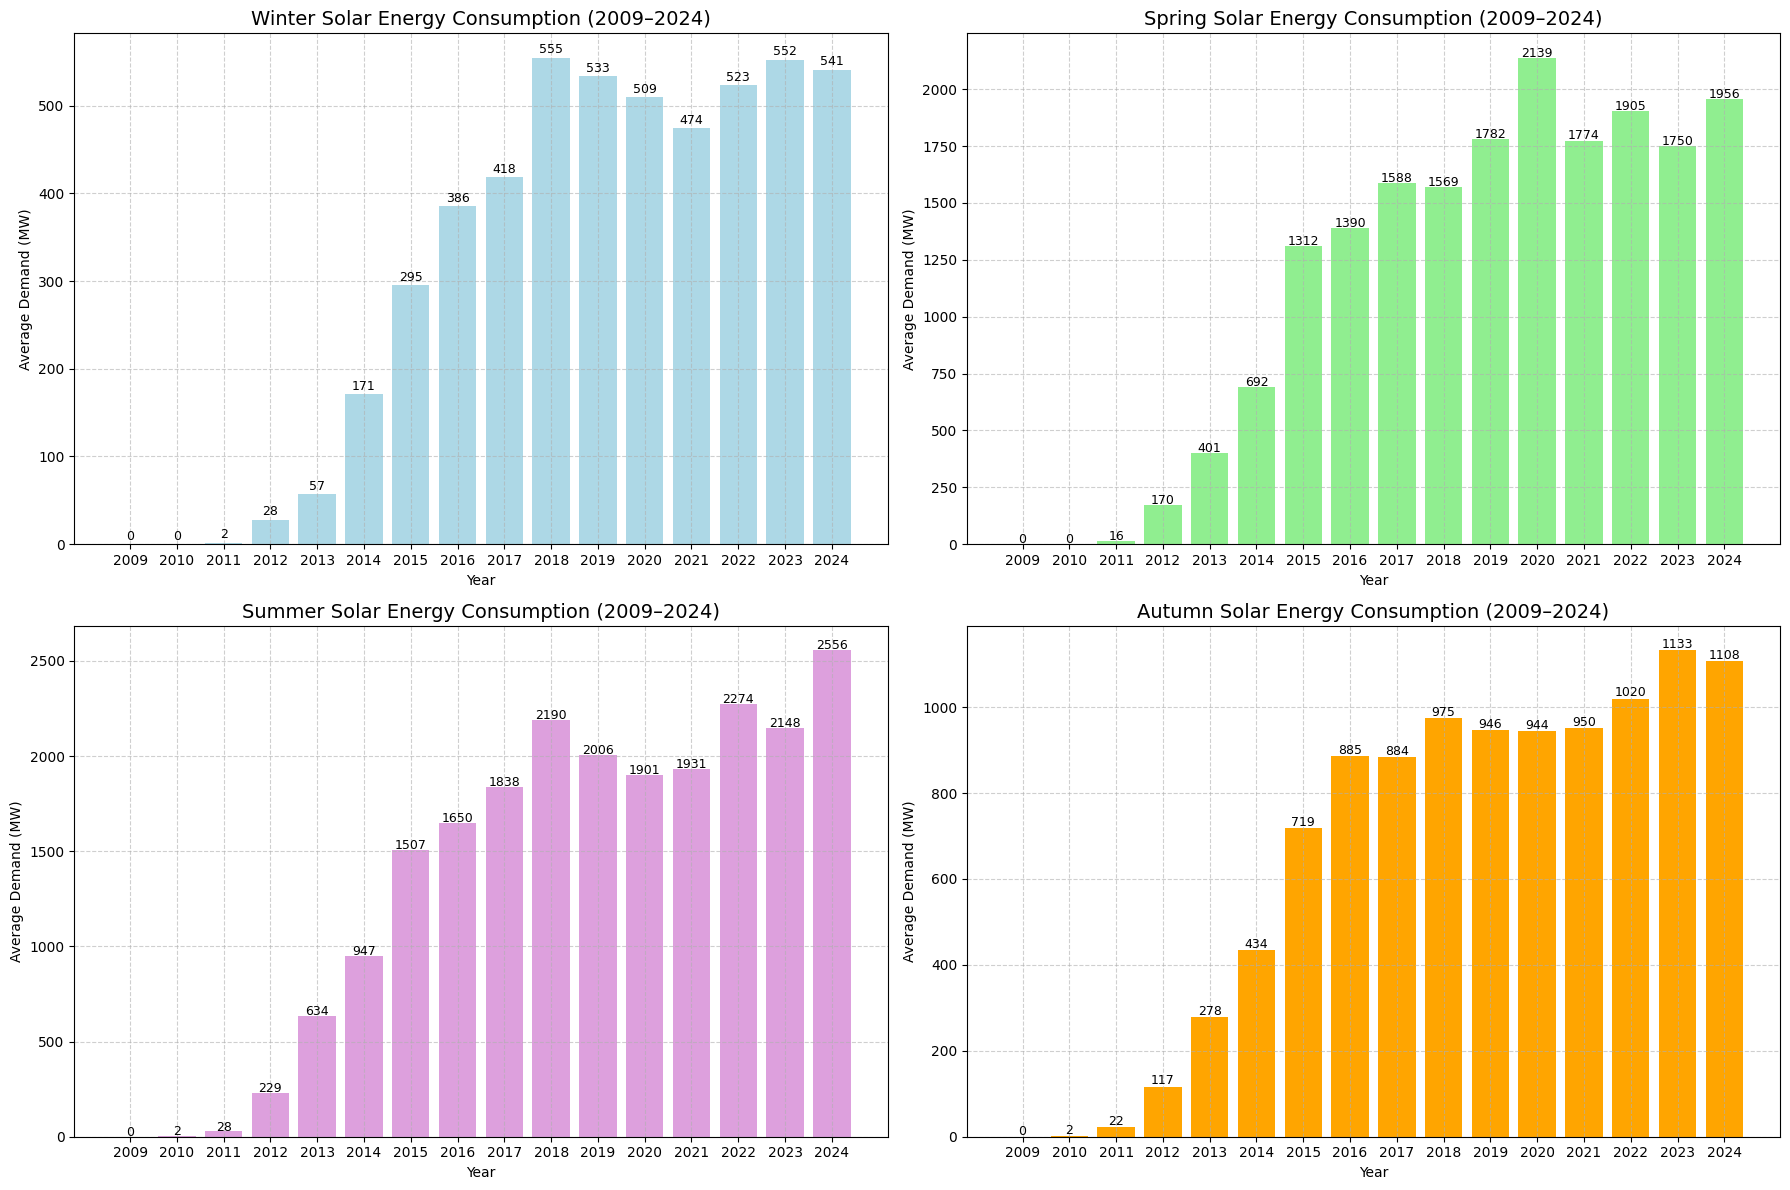

In [104]:
df = final_data.dropna(subset=['embedded_solar_generation'])

# WINTER: Dec (previous year) + Jan, Feb (current year)
df['winter_year'] = df.apply(
    lambda row: row['year'] + 1 if row['month'] == 12 else row['year'], axis=1)
winter_df = df[df['month'].isin([12, 1, 2])]
winter_avg = winter_df.groupby('winter_year')['embedded_solar_generation'].mean().loc[2009:2024]

# SPRING: Mar, Apr, May
spring_df = df[df['month'].isin([3, 4, 5])]
spring_avg = spring_df.groupby('year')['embedded_solar_generation'].mean().loc[2009:2024]

# SUMMER: Jun, Jul, Aug 
summer_df = df[df['month'].isin([6, 7, 8])]
summer_avg = summer_df.groupby('year')['embedded_solar_generation'].mean().loc[2009:2024]

# AUTUMN: Sep, Oct, Nov
autumn_df = df[df['month'].isin([9, 10, 11])]
autumn_avg = autumn_df.groupby('year')['embedded_solar_generation'].mean().loc[2009:2024]

seasons = {
    'Winter': winter_avg,
    'Spring': spring_avg,
    'Summer': summer_avg,
    'Autumn': autumn_avg
}

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

colors = ['lightblue', 'lightgreen', 'plum', 'orange']
for i, (season, data) in enumerate(seasons.items()):
    ax = axes[i]
    ax.bar(data.index.astype(str), data.values, color=colors[i])
    ax.set_title(f'{season} Solar Energy Consumption (2009–2024)', fontsize=14)
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Demand (MW)')
    ax.grid(True, linestyle='--', alpha=0.6)
    
    for j, value in enumerate(data.values):
        ax.text(j, value + 5, f'{value:.0f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()